<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>
* Student 1 Full Name and Number : Yue Chang 872301
* Student 2 Full Name and Number : Qiushu Chen 894461
* Workshop day : Wednesday
* Workshop time : 6:15pm

# <font color='blue'> Workshop 2 – Machine Learning (ML) [2 weeks] </font>

## Objectives:

* Gain hands-on experience with basic machine learning paradigms.
* Familiarise yourself with some of the practical software tools used for machine learning.
* Solve basic machine learning problems using Python Scipy and Scikit-learn.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
Optimisation is widely used in engineering (practice and research) today. That was not always so (see e.g. Boyd's book's preface). I expect that in the future machine learning will be as prevalently used in engineering as optimisation is used today. The arguments in favour of it are (a) increasingly more powerful computing (b) lots of data (c) decreasing storage and computing costs. At the end of the day, "machine learning" benefits substantially from these trends. However, it is still early days and we will hopefully see together how engineering world will evolve in this century.

In this workshop, you will learn how to solve machine learning problems in practice and apply common algorithms to various data sets. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with simple, easy-to-visualise (2D) data sets so that concepts become clear. More interesting problems and data will be posed as open-ended (and optional) problems.

You will also familiarise yourself with machine learning libraries of Python, which is the de-facto language for ML these days. Still, the tools and data are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better ML frameworks and more complex data sets but it is not realistic to cover all in two weeks. Due to time limitations, we unfortunately do not focus on a big topic in this workshop and subject: [data science](https://study.unimelb.edu.au/find/courses/graduate/master-of-data-science/what-will-i-study/). You should not get the wrong impression from the nice, cleaned-up data sets you are given in this workshop. In real life, data is messy (as everything else!) and more than half of data science is about preparing data itself. 

> In the future, you should consider learning additional ML software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. I would also recommend learning more about data preparation and analysis. The popular [Pandas](https://pandas.pydata.org/) library, which we briefly use, makes a good starting point.

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from LMS/Resources-Reading
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use the [_Regressors_](https://regressors.readthedocs.io/en/latest/) package for convenience for couple of minor things. You can [install the package](https://regressors.readthedocs.io/en/latest/installation.html) simply by using

```pip install regressors``` 

from within the Anaconda environment. Ask for help from your demonstrator in case you need it.



## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

# Section 1: Linear Regression, Overfitting, and Regularisation

## 1.1 _Example_. Using curve fitting to model Diode characteristics.

![Diode characteristic](img/diode.png)

The diagram above shows the I-V curve of a [diode](https://en.wikipedia.org/wiki/Diode) widely used in electronic circuits, see [1N4001-D spec sheet (right click to download)](1N4001-D.pdf).

We can use regression to model the I-V curve of this diode at 25 degrees C. 

Using the nice tool, [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/), a small and clean data set is generated and stored in [csv format](https://en.wikipedia.org/wiki/Comma-separated_values). We now use the famous [pandas library](https://pandas.pydata.org/) to read the *csv* file.

In [100]:
# %matplotlib notebook
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib

dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
# Note that if you don't put names to csv or into the function as above, 
# pandas ignores the first row in calculations!
dataset.head()

Vf        If
0  0.794737  0.100714
1  0.801316  0.111255
2  0.806579  0.127593
3  0.811842  0.140954
4  0.815789  0.153793

C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


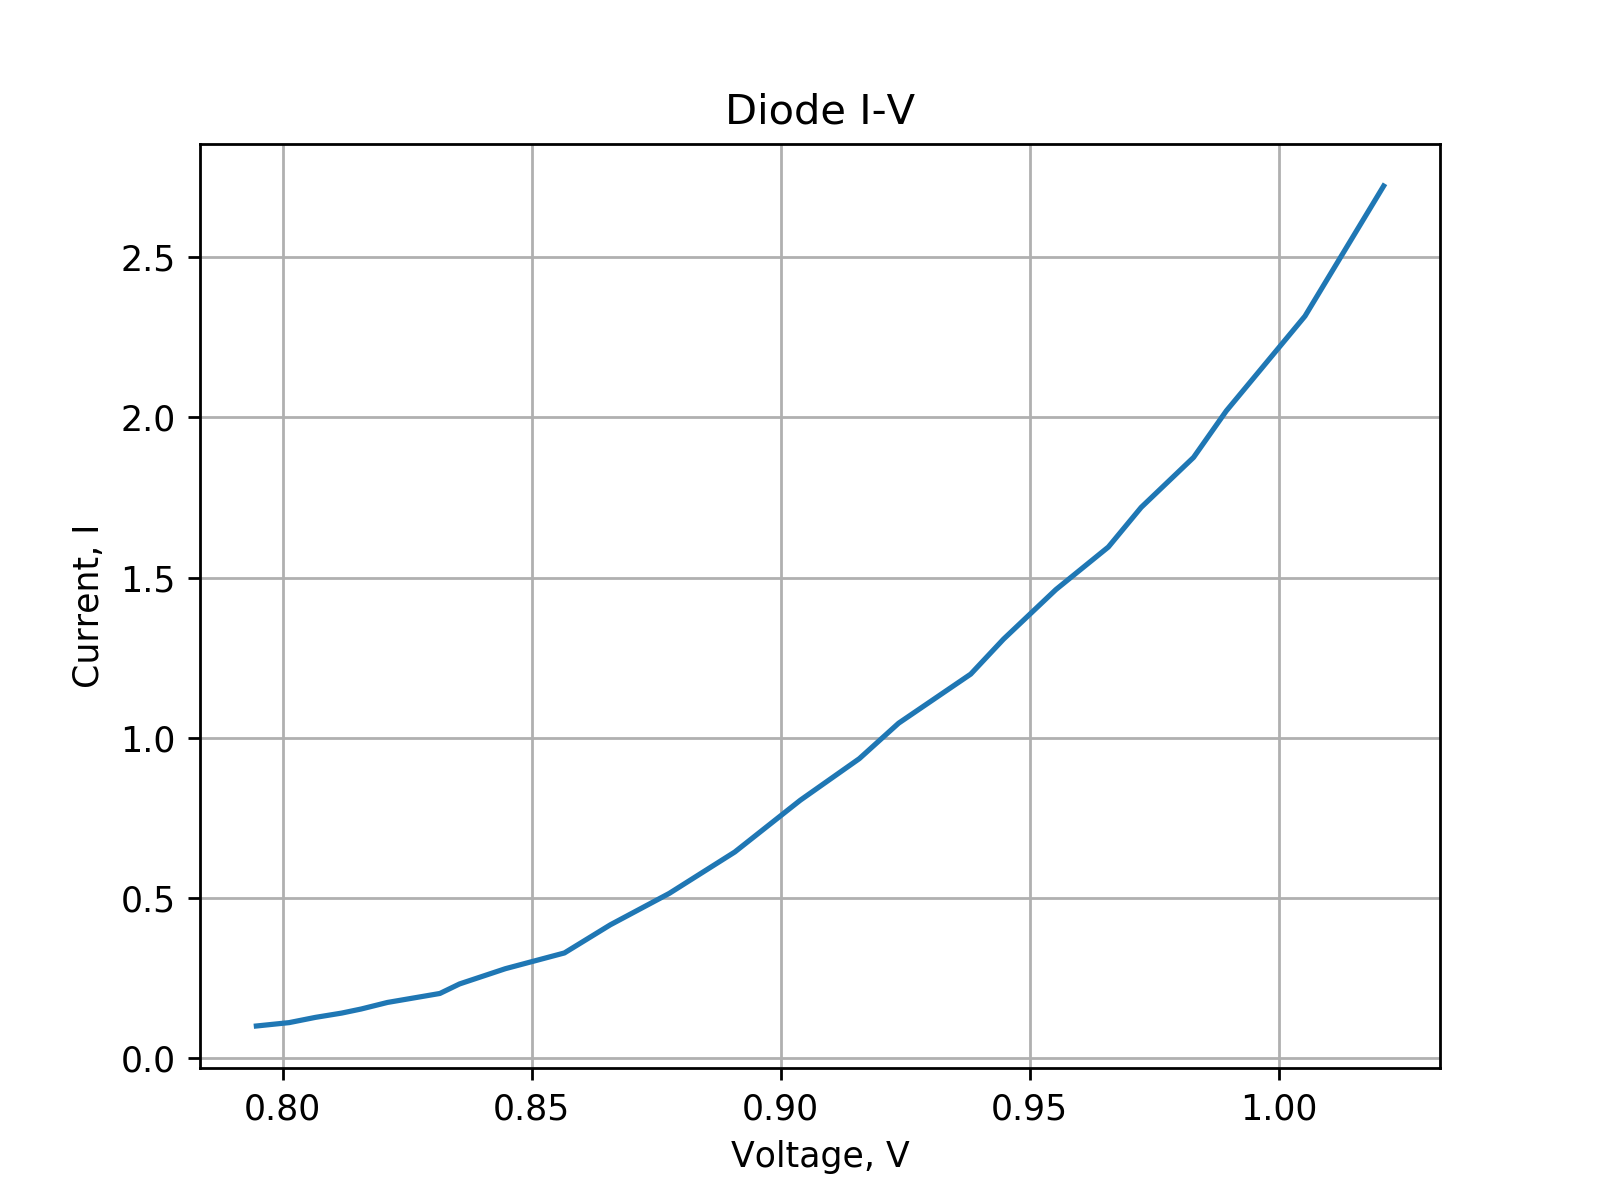

In [101]:
plt.figure()
plt.plot(dataset.values[:,0], dataset.values[:,1])
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

_Note that the figure above is convex but the one above was looking concave! Can you see why?_

### Question 1.1 (2 pts).

Let $I=f(V)=a+bV$, for $a, b \in \mathbb{R}$.
Find the best $(a, b)$ to minimise the error between the $N$ data points $(I_j, V_j)$ and the chosen linear model. 

$$\min_{a, b} \sum_{j=1}^N (I_j- (a + b V_j))^2 $$

1. (1 pts) Find the $a, b$ by solving the unconstrained optimisation problem above symbolically and by hand. Then, using the given data set $\{I, V\}$ and formulas you have derived, find the values of $a, b$ directly.
2. (1 pt) Plot the linear I-V curve you have found with the additional constraint $I \geq 0$ or $\max(I, 0)$.

**Answer as text here**
1. Denote objective function as:
$$J(a, b)=\sum_{j=1}^N (I_j- (a + b V_j))^2$$
Solve for first order derivative:
$$\frac{\partial J(a, b)}{\partial a}=\sum_{j=1}^N I_{j}-a N-b \sum_{j=1}^N V_{j}=0$$

$$\frac{\partial J(a, b)}{\partial b}=\sum_{j=1}^{N} V_{j} I_{j}-a \sum_{j=1}^{N} V_{j}-b \sum_{j=1}^{N} V_{j}^{2}=0$$

Then we get $a,b$ as:
$$a=\frac{\sum_{j=1}^{N} I_{j} \sum_{j=1}^{N} V_{j}^{2}-\sum_{j=1}^{N} V_{j}I_{j} \sum_{j=1}^{N} V_{j}}{N  \sum_{j=1}^{N} V_{j}^{2}-\sum_{j=1}^{N} V_{j} \cdot \sum_{j=1}^{N} V_{j}}$$

$$
b=\frac{N \sum_{j=1}^{N} V_{j} I_{j}-\sum_{j=1}^{N} V_{j} \sum_{j=1}^{N} I_{j}}{N \sum_{j=1}^{N} V_{j}^{2}-\sum_{j=1}^{N} V_{j} \sum_{j=1}^{N} V_{j}}
$$

Solve for second order derivative:

$$\frac{\partial J^2(a, b)}{\partial a^2}=2N \;\;\;  \frac{\partial J^2(a, b)}{\partial a \partial b}=\sum_{j=1}^{N}2 V_{j}$$

$$\frac{\partial J^2(a, b)}{\partial b \partial a}=\sum_{j=1}^{N}2 V_{j}\;\;\; \frac{\partial J^2(a, b)}{\partial b^2}=\sum_{j=1}^{N} 2 V_{j}^2$$
So we can see that the Hessian is pos-definite, the solved a and b minimize objective function.

a: -8.691267803429376
b: 10.714559790869185


<IPython.core.display.Javascript object>


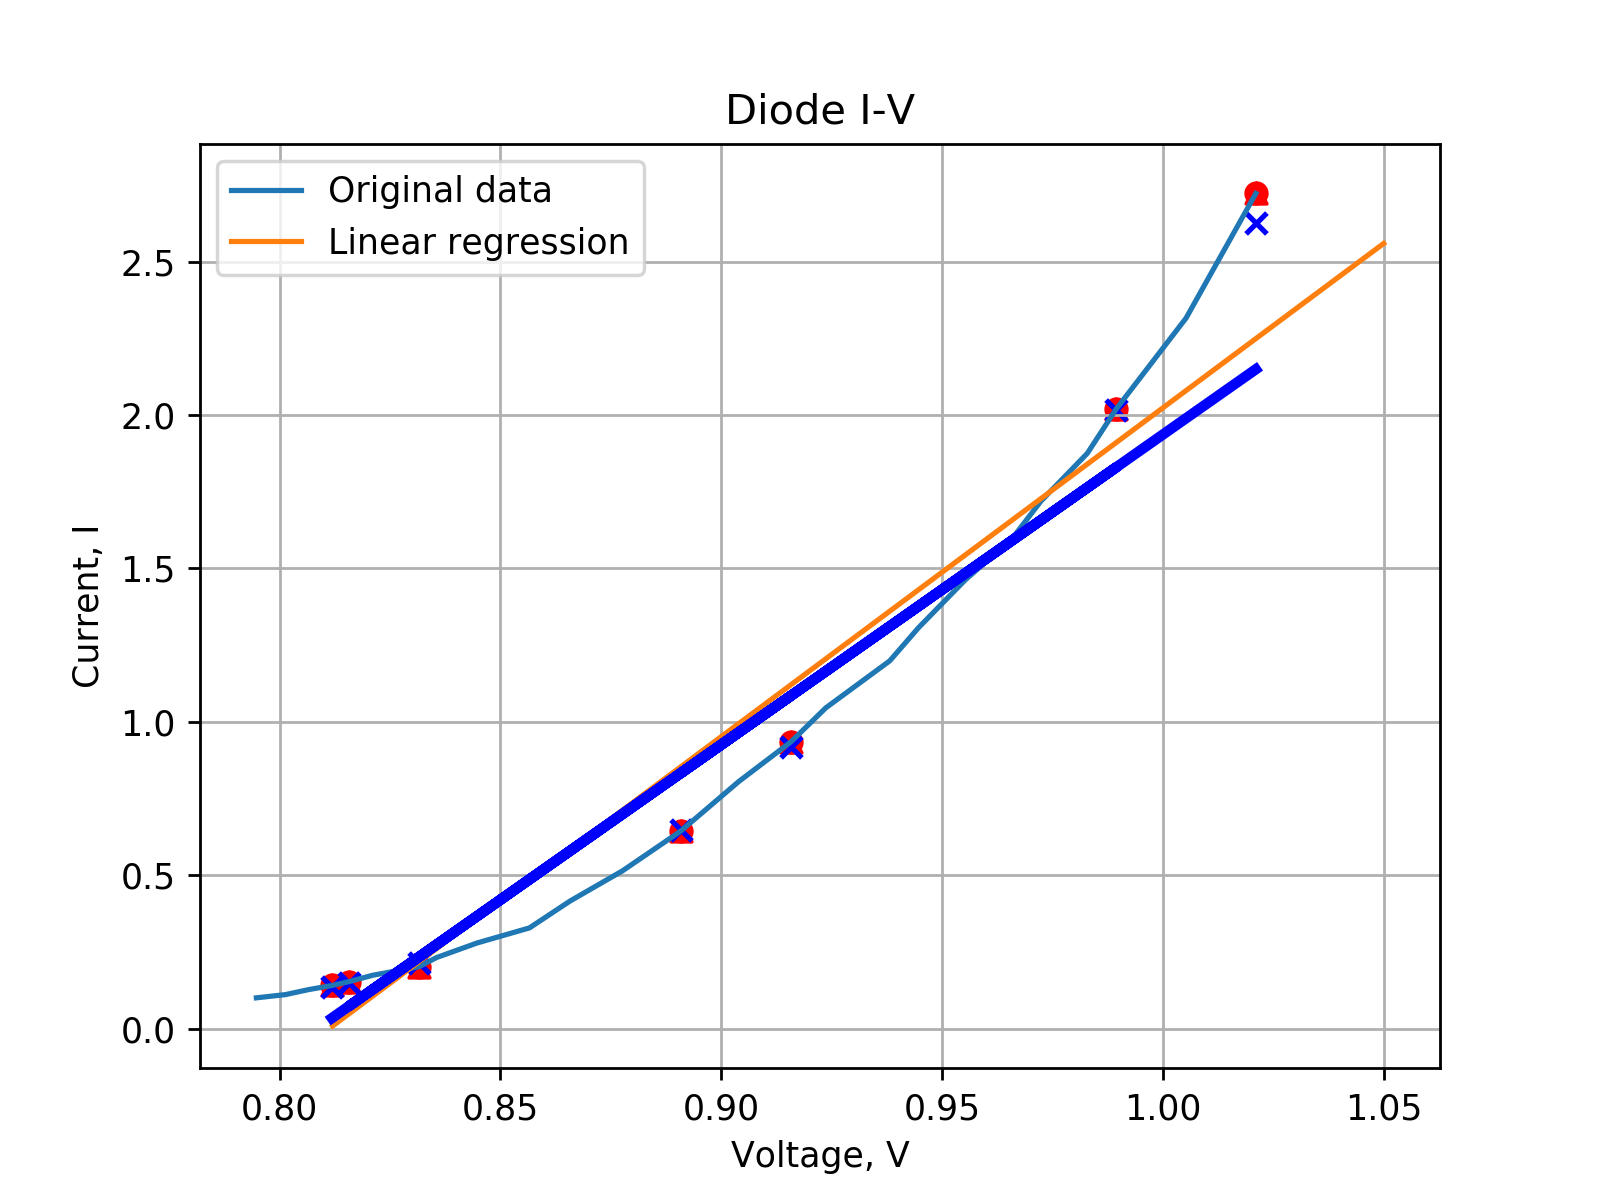

In [102]:
''' Answer as code here '''
sum_V = dataset['Vf'].sum()
sum_I = dataset['If'].sum()
sum_VI = (dataset['Vf']*dataset['If']).sum()
sum_V2 = (dataset['Vf']*dataset['Vf']).sum()
N = dataset.shape[0]
a=(sum_I*sum_V2-sum_VI*sum_V)/(N*sum_V2-sum_V*sum_V)
b=(N*sum_VI-sum_I*sum_V)/(N*sum_V2-sum_V*sum_V)
print("a:",a)
print("b:",b)
plt.figure()
plt.plot(dataset.values[:,0], dataset.values[:,1])
plt.grid()
def f(x):
    return b*x+a
# define x and y
x = np.linspace(0.812, 1.05, 100) # 100 equally spaced points on interval [-20,20]
y = f(x) # call function f(x) and set y to the function's return value
# Plot the function y=f(x) (the linear regression)
plt.plot(x,y)
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.legend(labels = ['Original data', 'Linear regression'], loc = 'best')
plt.show()

### Question 1.2 (8 pts)

Now we will use *sklearn (scikit-learn)* to solve this problem.

1. First fit a [linear model](https://scikit-learn.org/stable/modules/linear_model.html) using "linear_model.LinearRegression()". Plot the result, find the coefficients, and calculate the mean square error (MSE).
2. Next fit a [polynomial model](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) of second degree, i.e. a quadratic model. Plot the model, find the coefficients, and calculate MSE. Interpret and discuss the results.
3. Add a regularisation term, i.e use [ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Do you observe an improvement? Discuss.
4. Try couple of higher order models (e.g. 4, 6) without regularisation, and provide the results as before. What do you observe when you compare the coefficients? Find validation and training errors for the models and discuss/interpret your results.

#### Hints
1. you will need to use [pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline). To access coefficients use model.named_steps['linearregression'].coef_  or model.named_steps['ridge'].coef_
2. the train_test_split function provides a very convenient way of shuffling the data and dividing it into  training and test sets (3:1 default ratio), see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [103]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# full data in correct form for sklearn
Vfulldata = np.array(dataset.values[:,0]).reshape(-1,1) # reshape needed for sklearn functions
Ifulldata = np.array(dataset.values[:,1]).reshape(-1,1)

# split into training and test sets
Vtrain, Vtest, Itrain, Itest = train_test_split(Vfulldata, Ifulldata)

**Answer as text here**
2. From the plot, we can see that the quadratic model is clearly a better fit, we can also see it has a lower MSE than the first order model.
3. We tried to add regularisation term on order 4 and 6's models, we can see from the plots, there is no much improvement and MSE both are sufficiently small. But there is a big difference on the coefficients, the coefficients are small for such high order model.
4. When we try out the higher order models the 4th and 6th order with and without regularisation, we can see from the plots that, with and without regularisation show no much difference on curve-fitting performance, and the MSE both are small. However, when looking at the coefficients we can see that the ones with regularisation reduce the coefficients significantly, which means that it will reduce the model's complexity thus leads to smaller chance of overfitting.

In [104]:
''' Answer as code here '''
print("=========================1.2.1===============================")
# Create linear regression object
reg1 = linear_model.LinearRegression()
# Train the model using the training sets
reg1.fit(Vtrain,Itrain)
# Make predictions using the testing set
pred1 = reg1.predict(Vtest)
# The mean squared error
mse1 = mean_squared_error(pred1,Itest)
# The coefficients
print('Coefficients:', reg1.coef_)
# The mean squared error
print("Mean squared error: ",mse1)
plt.scatter(Vtest, Itest,  color='red')
plt.plot(Vtest,pred1, color='blue', linewidth=3)
plt.legend(labels = ['Linear regression', 'Original data'], loc = 'best')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

=========================1.2.1===============================
Coefficients: [[10.10629087]]
Mean squared error:  0.0630361967548132


In [105]:
print("=========================1.2.2===============================")
# fit to an order-3 polynomial data
pipe = make_pipeline(PolynomialFeatures(degree=2),linear_model.LinearRegression(fit_intercept=False))
model = pipe.fit(Vtrain, Itrain)
print("Coefficient",model.named_steps['linearregression'].coef_)
pred2 = model.predict(Vtest)
# The mean squared error
print("Mean squared error:",mean_squared_error(Itest,pred2))
# Plot
plt.scatter(Vtest, Itest,  marker = '^',color='red')
plt.scatter(Vtest, pred2, marker = 'x',color='blue')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.legend(labels = ['Original data', 'Linear regression'], loc = 'best')
plt.title('Diode I-V')
plt.grid()
plt.show()

=========================1.2.2===============================
Coefficient [[ 25.00771692 -64.45240013  41.65393118]]
Mean squared error: 0.0014323271395567864


=========================1.2.3===============================
Coefficient [[ 0.         -1.31330305 -1.47296551 -0.87215955  0.200139    1.53447759
   2.98175725]]
Mean squared error: 0.0011860509382038368


C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


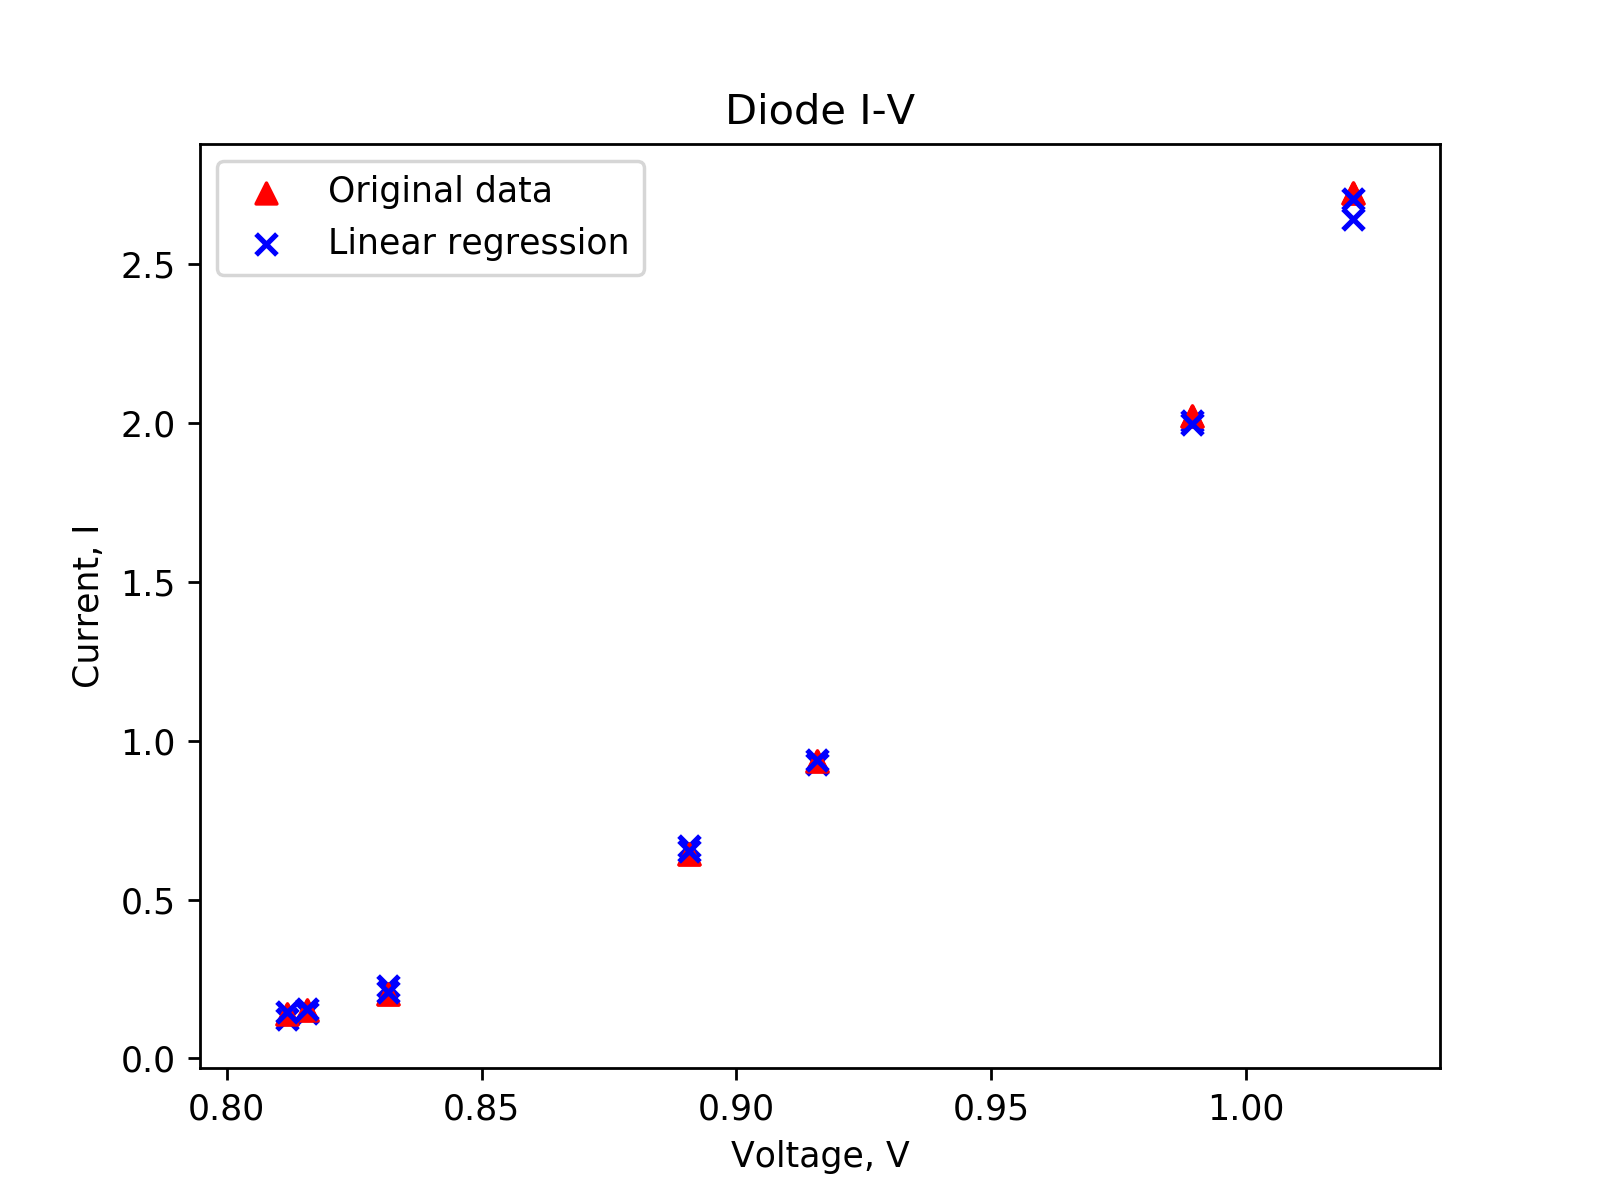

In [106]:
print("=========================1.2.3===============================")
pipe2 = make_pipeline(PolynomialFeatures(degree=6),linear_model.RidgeCV(alphas = [0.001,0.01,0.05],cv=3))
model1 = pipe2.fit(Vtrain, Itrain)
print("Coefficient",model1.named_steps['ridgecv'].coef_)
pred3 = model1.predict(Vtest)
# The mean squared error
print("Mean squared error:",mean_squared_error(Itest,pred3))
# Plot
plt.figure()
plt.scatter(Vtest, Itest,  marker = '^',color='red')
plt.scatter(Vtest, pred3, marker = 'x',color='blue')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.legend(labels = ['Original data', 'Linear regression'], loc = 'best')
plt.title('Diode I-V')
plt.grid()
plt.show()

In [107]:
print("=========================1.2.4===============================")
# fit to an order-3 polynomial data
pipe1 = make_pipeline(PolynomialFeatures(degree=6),linear_model.LinearRegression(fit_intercept=False))
model1 = pipe1.fit(Vtrain, Itrain)
print("Coefficient",model1.named_steps['linearregression'].coef_)
pred4 = model1.predict(Vtest)
# The mean squared error
print("Mean squared error:",mean_squared_error(Itest,pred4))
# Plot
plt.scatter(Vtest, Itest,  marker = '^',color='red')
plt.scatter(Vtest, pred4, marker = 'x',color='blue')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.legend(labels = ['Original data', 'Linear regression'], loc = 'best')
plt.title('Diode I-V')
plt.grid()
plt.show()

=========================1.2.4===============================
Coefficient [[ -32793.75625069  210788.38402059 -561979.11291815  795317.08529681
  -629999.06959364  264776.38630585  -46107.71409157]]
Mean squared error: 0.0001378228798640742


# Section 2: Clustering and Gaussian Mixtures

Unsupervised learning is all about data. We will use first the famous two moon data set to practice a little bit and digest some of the fundemental concepts. Since two moons data inherently has two clusters (each moon as a cluster), we can use this as a [ground truth](https://en.wikipedia.org/wiki/Ground_truth). In most real problems, we don't have this luxury of having the ground truth at hand! 

C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


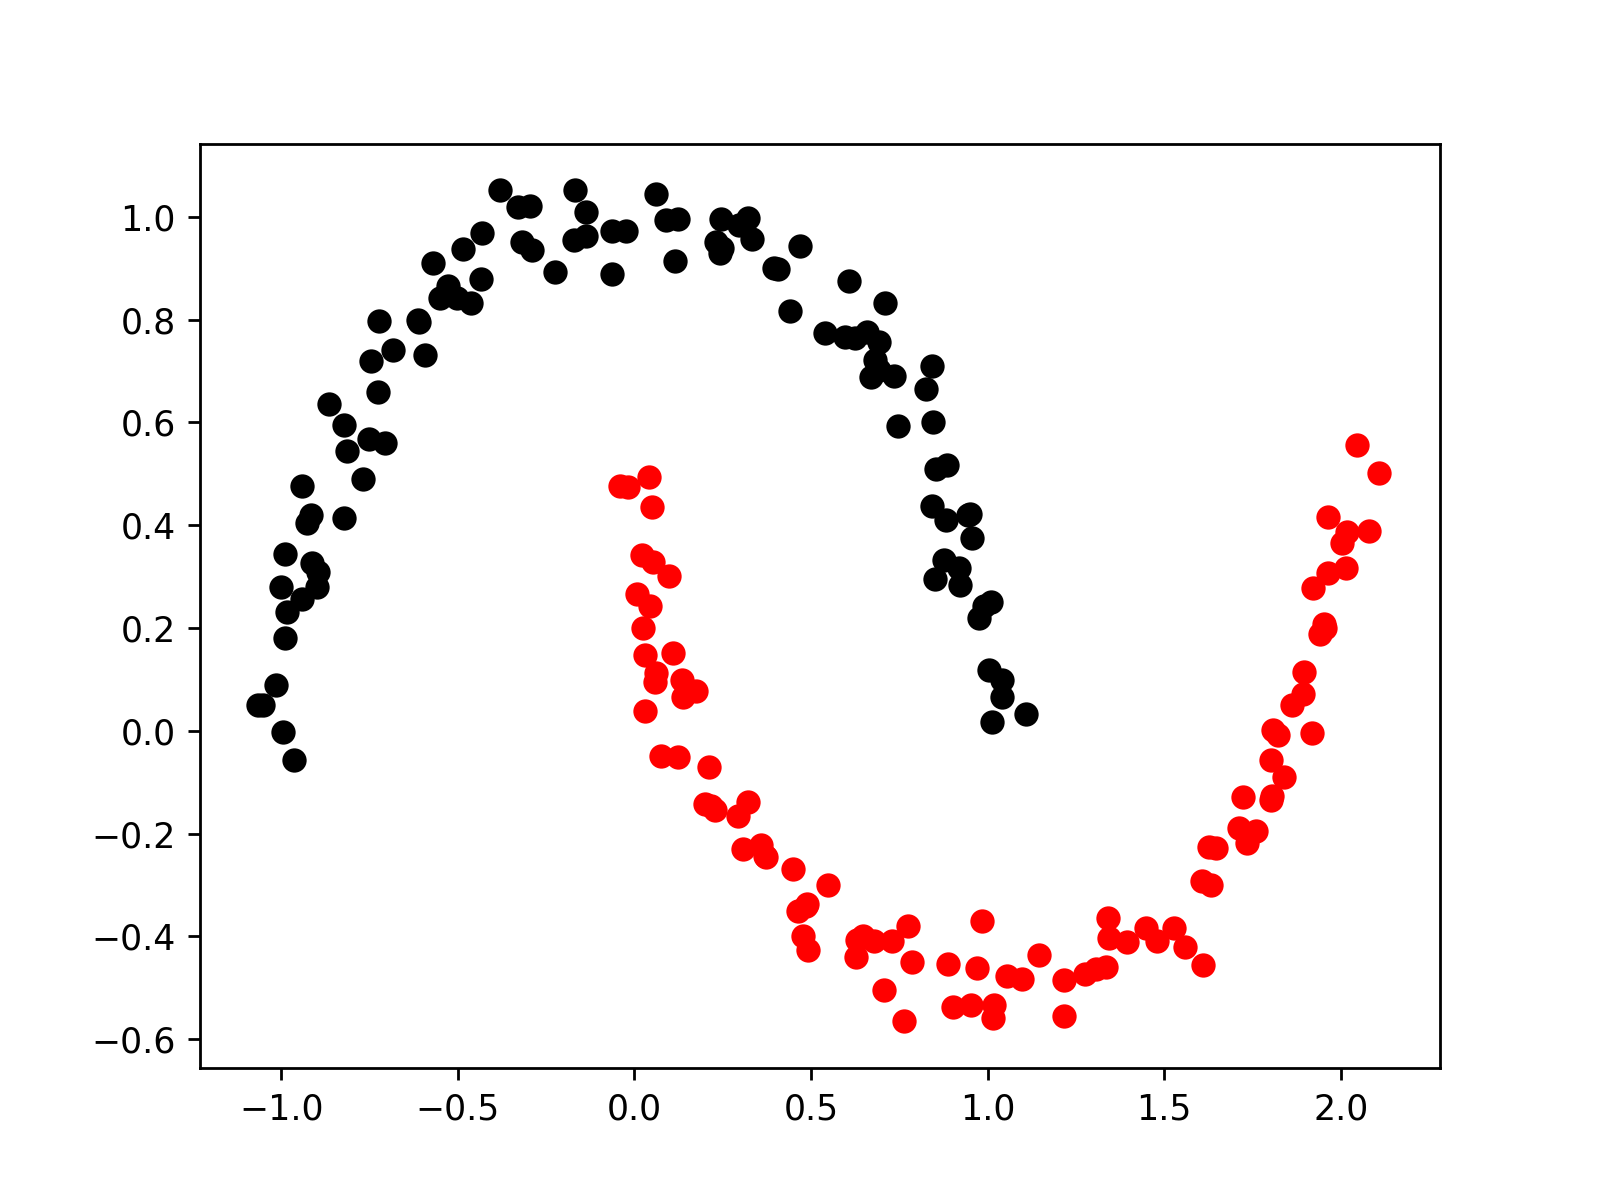

In [108]:
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics


noisy_moons = datasets.make_moons(n_samples=200, noise=0.05)
X = noisy_moons[0] # data points
y = noisy_moons[1] # 0, 1 labels of class, 50 each - giving us the ground truth

order_ind = np.argsort(y) # order labels, 50 each class
X1 = X[order_ind[0:100]]   # class 1
X2 = X[order_ind[101:200]] # class 2

# Plot data
plt.figure()
plt.scatter(X1[:,0], X1[:,1], color='black')
plt.scatter(X2[:,0], X2[:,1], color='red')
plt.show()

### Question 2.1.  K-means clustering (4 pts)

1. Use sklearn (scikit-learn) k-means clustering algorithm to divide the two moon data given above (X) into two clusters. Plot the result and show the cluster centres that you found.
2. Experiment with different starting points (init='random') and number of clusters, e.g. 3, 4, 5. Write your observations and interpret them using your theoretical knowledge from lectures and books.

**Answer as text here**
2. We observe that when we change the starting point to be random, and the clustering results are the same for same cluster numbers, which means the K-means clustering converge after a finite number of iterations, in our case the interations is 10.

=========================2.1.1 & 2.1.2===============================


<IPython.core.display.Javascript object>


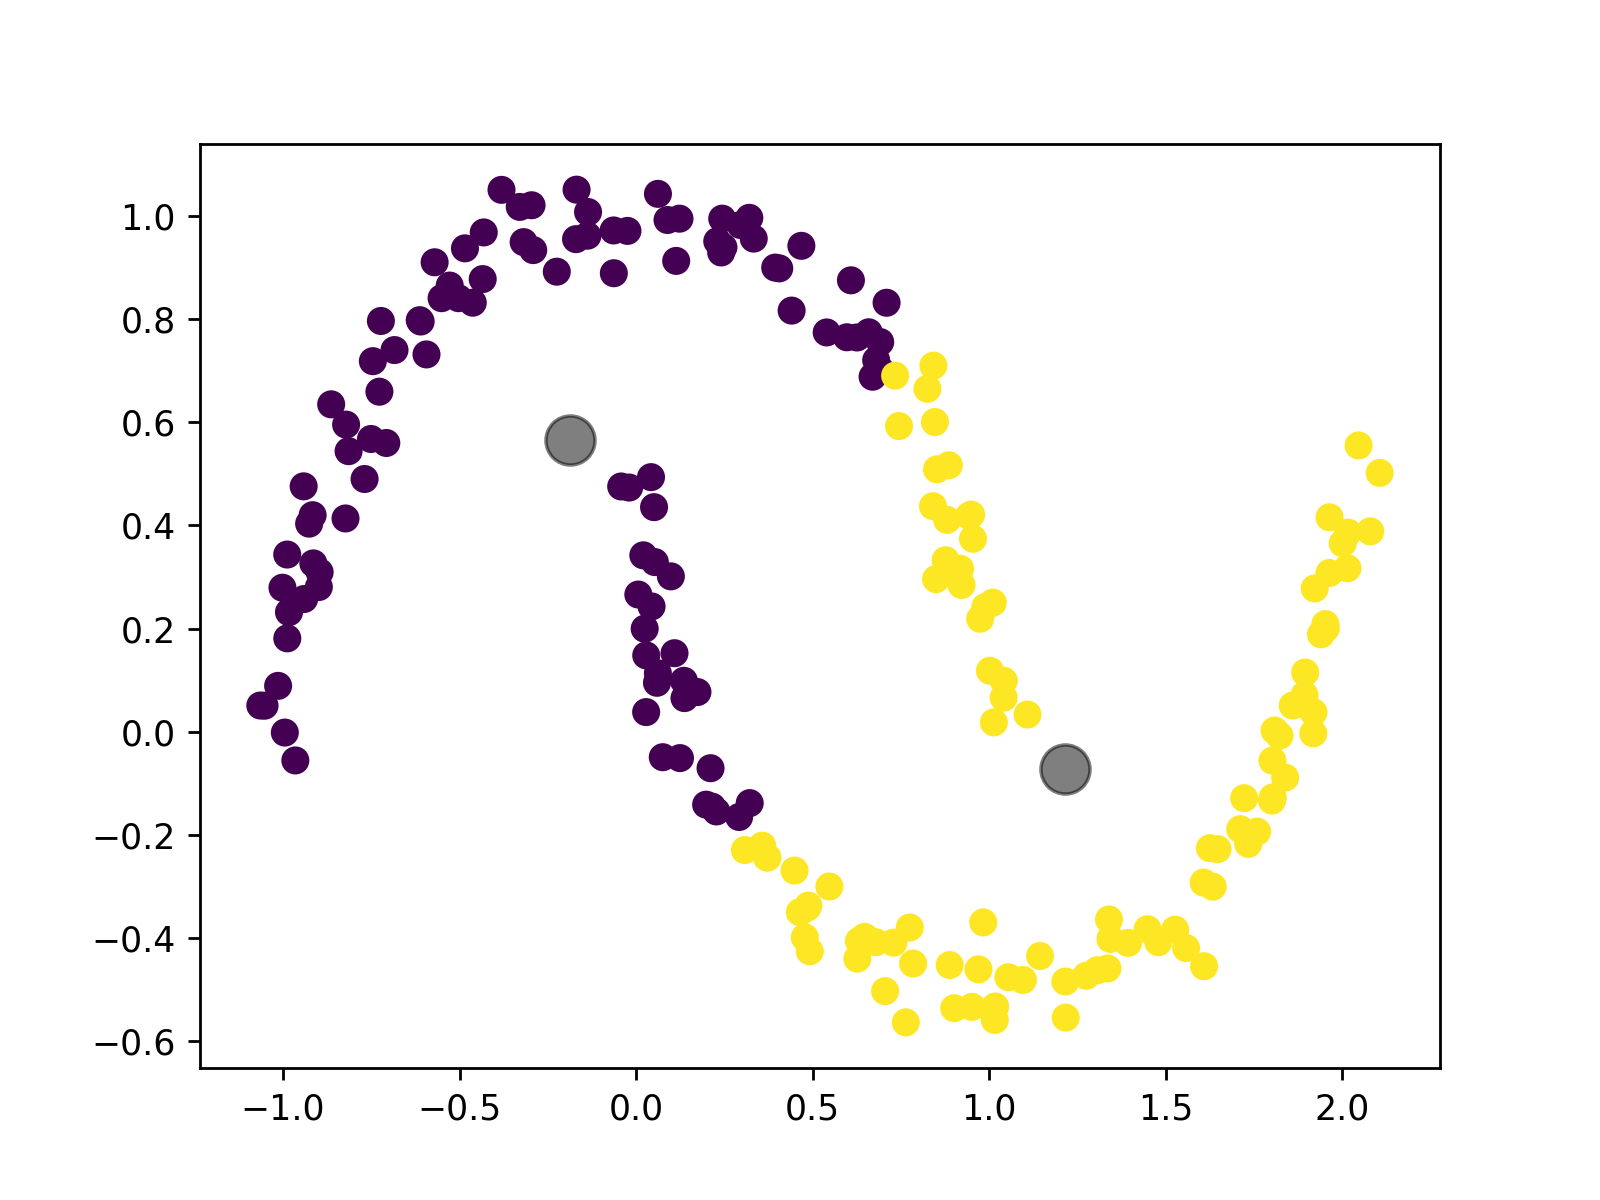

C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


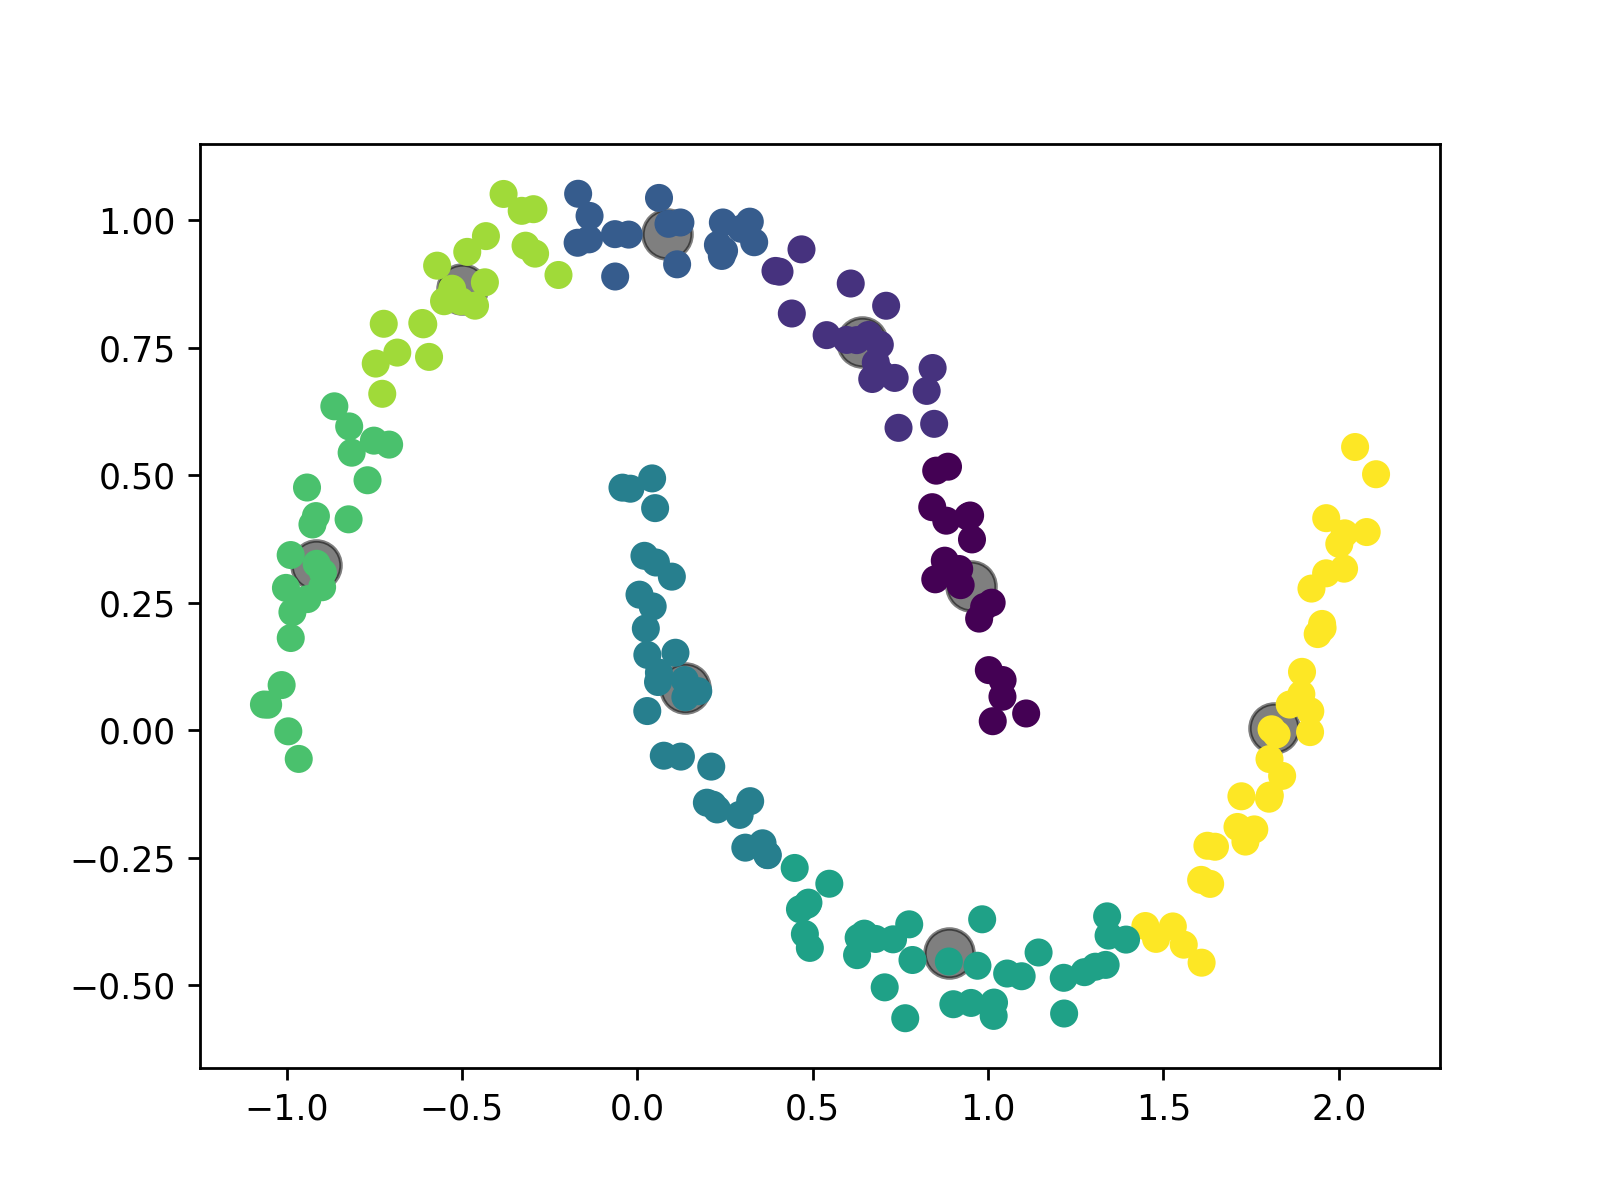

In [109]:
print("=========================2.1.1 & 2.1.2===============================")
kmeans = KMeans(init='random', n_clusters=2, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()
kmeans = KMeans(n_clusters=8,init = 'random')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()

### Question 2.2.  GMM as density estimator (6 pts)

1. Now use a Gaussian mixture model (GMM) for clustering the same two moon data. Try two clusters and plot your results. GMMs also provides you probabilities (of a sample belonging to a cluster). Print those of a few samples.
2. Increase the number of components of your GMM model. What do you observe? Use a metric to choose the number of components in a principled way. *Hint: check [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) or [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) *
3. It is maybe better to use GMM as a **generative model**! Generate 200 brand new samples from a well functioning gmm model with your choice of parameters and plot your results.


**Answer as text here**
2. When we increase the number of components of the GMM model, we can see the probabililty have more '1's, which means that our model can put each point into the cluster with less ambiguity. Then we use BIC to choose the number of components.

=========================2.2.1===============================
[[0.005 0.995]
 [1.    0.   ]
 [0.993 0.007]
 [0.    1.   ]
 [0.999 0.001]
 [0.992 0.008]
 [0.    1.   ]
 [0.512 0.488]
 [0.997 0.003]
 [0.    1.   ]]


C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


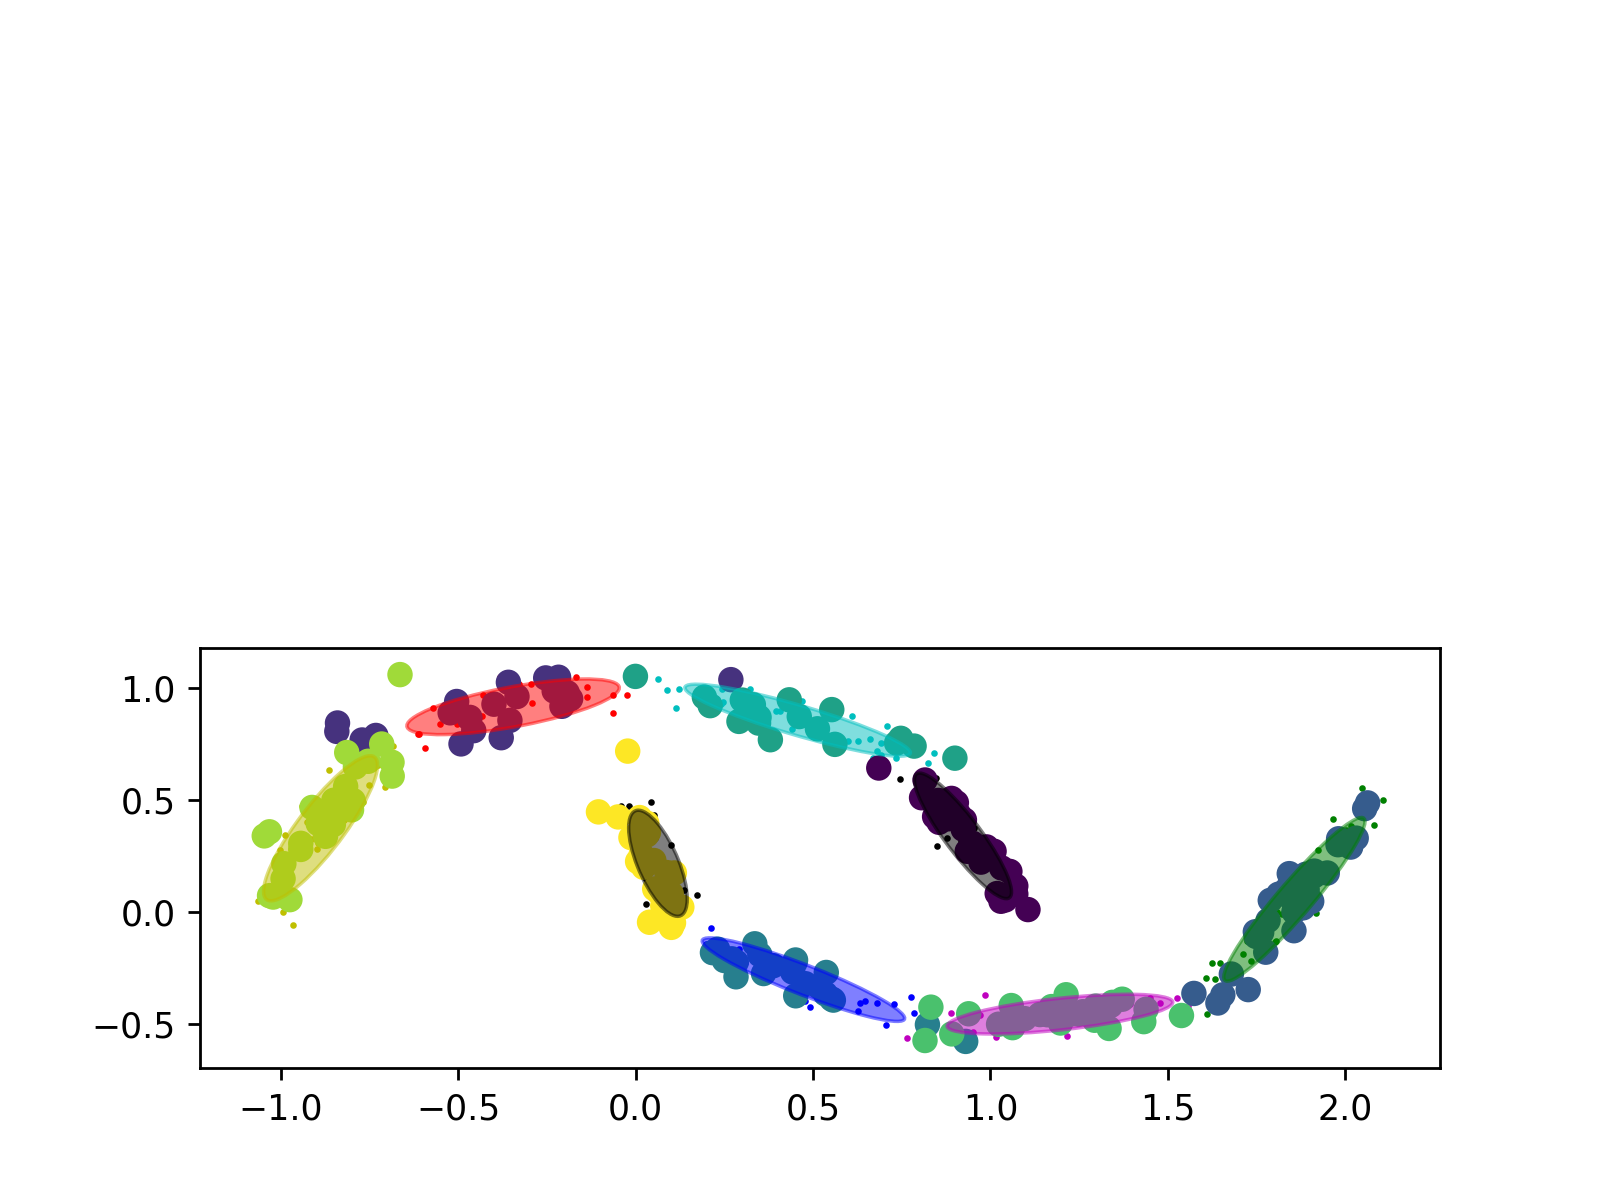

In [110]:
print("=========================2.2.1===============================")
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)
print(probs[:10].round(3))
plt.figure()
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

In [111]:
print("=========================2.2.2===============================")
#*Find the best gmm model per BIC. 
#*Two parameters will be considered:n_components and covariance_type.
#*BIC smallest one is the best one.
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm   = gmm

#prepare to plot
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
bestGmm = best_gmm
bars = []
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = bestGmm.predict(X)
for i, (mean, cov, color) in enumerate(zip(bestGmm.means_, bestGmm.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.show()
print("****************Selected model parameters using BIC**************")
print(bestGmm)

=========================2.2.2===============================
****************Selected model parameters using BIC**************
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


In [112]:
print("=========================2.2.3===============================")
data_new = best_gmm.sample(200)
new_data = data_new[0]
plt.scatter(new_data[:, 0], new_data[:, 1], c=data_new[1], s=40, cmap='viridis');
plt.show()

=========================2.2.3===============================


# Section 3: PCA and Simple Classification

It is time to move beyond the toy data set. The next data set is still small and clean but is more interesting!

## 3.1 _Example_. Wireless Indoor Localization

The next data set shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

This [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) was used in the following publications:
> * Jayant G Rohra, Boominathan Perumal, Swathi Jamjala Narayanan, Priya Thakur, and Rajen B Bhatt, 'User Localization in an Indoor Environment Using Fuzzy Hybrid of Particle Swarm Optimization & Gravitational Search Algorithm with Neural Networks', in Proceedings of Sixth International Conference on Soft Computing for Problem Solving,2017, pp. 286-295.
> * Rajen Bhatt, 'Fuzzy-Rough Approaches for Pattern Classification: Hybrid measures, Mathematical analysis, Feature selection algorithms, Decision tree algorithms, Neural learning, and Applications', Amazon Books 


In [113]:
dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
dataw.tail()

s1  s2  s3  s4  s5  s6  s7  Room Number
1995 -59 -59 -48 -66 -50 -86 -94            4
1996 -59 -56 -50 -62 -47 -87 -90            4
1997 -62 -59 -46 -65 -45 -87 -88            4
1998 -62 -58 -52 -61 -41 -90 -85            4
1999 -59 -50 -45 -60 -45 -88 -87            4

In [114]:
print(dataw.size, dataw.shape)

16000 (2000, 8)


In [115]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1 
# loc.shape
# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)

### Question 3.1.  Clustering-based classification (6 pts)

1.  (2 pts) Use Kmeans clustering on training data to find the 4 cluster corresponding to the rooms. Then, test their quality using a [mutual information based score.](https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores) 
2.  (2 pts) Conduct a [PCA analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data with 2, 3, 4 features: find singular values, variance ratios, and plot in 2D or 3D (for 2 or 3 features). What is the number of features that balances information and complexity? Is there redundancy in data? Discuss.
3. (1 pt) Now, repeat Kmeans clustering with the PCA-transformed data. Do you see an improvement in scores? Why or why not? Discuss, based on your knowledge of PCA and Kmeans clustering. 
4. (1 pt) What information does Kmeans ignore when used for classification? Is what we do a good classification method? What can you say about the complexity of the problem given?

**Answer as text here**
2.  When number of features is 3, the information and complexity is balanced. From the printed results, we can see that cumulative explained variance is 0.904002638920352, which means that when the data is projected to 3D, we can retain approximately 90% of the varience, so it can be considered that it balanced the information and complexity. Yes, there is redundancy in our data by observing the results of explained_variance_ratio without dimension reduction explained_variance_ratio= 0.66034164 0.18829663 0.04633287 0.03527203 0.02626189 0.02362963 0.0198653, we can see that the first few components have a large value which means that the characteristic of the data can be represent by the a lower dimension of data. Also from the performance in the next question, when using k-means to do the location clustering into 4 rooms, we can see that even when the data is reduce to two dimension, the score is no much difference from the 7 dimension one, which means that using a lower dimension of data, we still can finish the task of clustering the locations into 4 rooms, so there is a redundancy in our data.
3. No, we couldn't see a significant increase in the score, because when doing the dimension reduction we are just extracting the most representative data to represent the whole data set, that means the mean characteristic won't change so we won't see an improvement in scores when doing clustering. 
4. When we do K-means, we can see in the printed result that the label of the original data is ignored and the order of the data is disorganized. K-means is not so good, for it only works locally and highly relies on the initial reference vectors, and we can see that the accuracy is always around 0.90. The complexity of Kmeans is O(Ndmq)，where N is number of d-dimension vectors，m is component number，q is iteration. Generally, m and q is much more less than N so the complexity can be considered as O(N), so the complexity is dominated by the dimension of data, when doing dimension reduction, Kmeans algorithm will have a less complexity.

In [116]:
print("=========================3.1.1===============================")
#KMean model and trainning
kmeans = KMeans(n_clusters=4, random_state=10).fit(SRItrain)
#predict
y_pred=kmeans.predict(SRItest)
adjustedMutualScore = metrics.adjusted_mutual_info_score(loctest, y_pred)
print("adjustedMutualScore = ",adjustedMutualScore)

=========================3.1.1===============================
adjustedMutualScore =  0.871593908872885


C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


=========================3.1.2===============================
****************************************************
dimension: 7
cumulative explained variance= 0.9999999999999999
explained_variance_ratio= [0.64941271 0.2078064  0.04960207 0.03061893 0.02417897 0.021399
 0.01698192]
explained_variance_= [305.08460684  97.62440937  23.30232634  14.38432757  11.35892812
  10.05293638   7.97786017]
singular_values_ [390.1758819  220.7137972  107.83255929  84.72177676  75.28681912
  70.82665637  63.09478762]
****************************************************
dimension: 4
cumulative explained variance= 0.9374401056425657
explained_variance_ratio= [0.64941271 0.2078064  0.04960207 0.03061893]
explained_variance_= [305.08460684  97.62440937  23.30232634  14.38432757]
singular_values_ [390.1758819  220.7137972  107.83255929  84.72177676]
****************************************************
dimension: 3
cumulative explained variance= 0.9068211725489133
explained_variance_ratio= [0.64941271 0.20

<IPython.core.display.Javascript object>


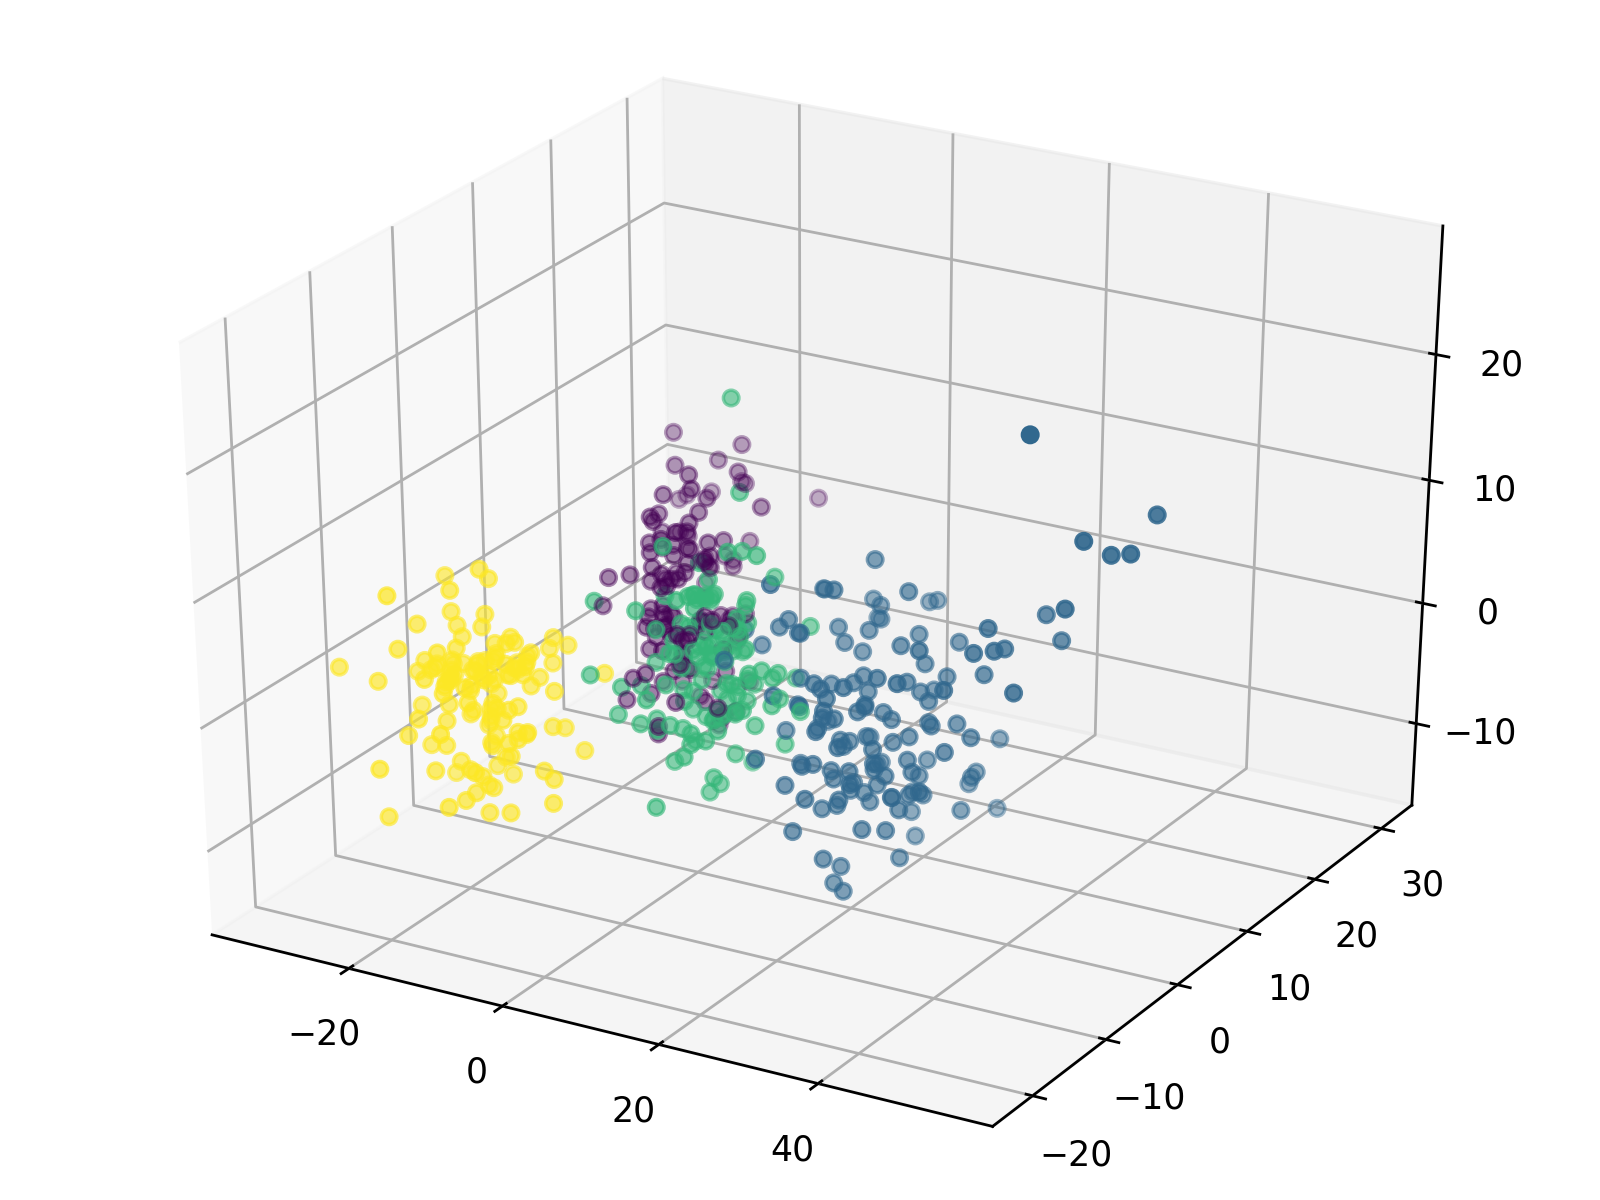

****************************************************
dimension: 2
cumulative explained variance= 0.8572191061647908
explained_variance_ratio= [0.64941271 0.2078064 ]
explained_variance_= [305.08460684  97.62440937]
singular_values_ [390.1758819 220.7137972]


C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


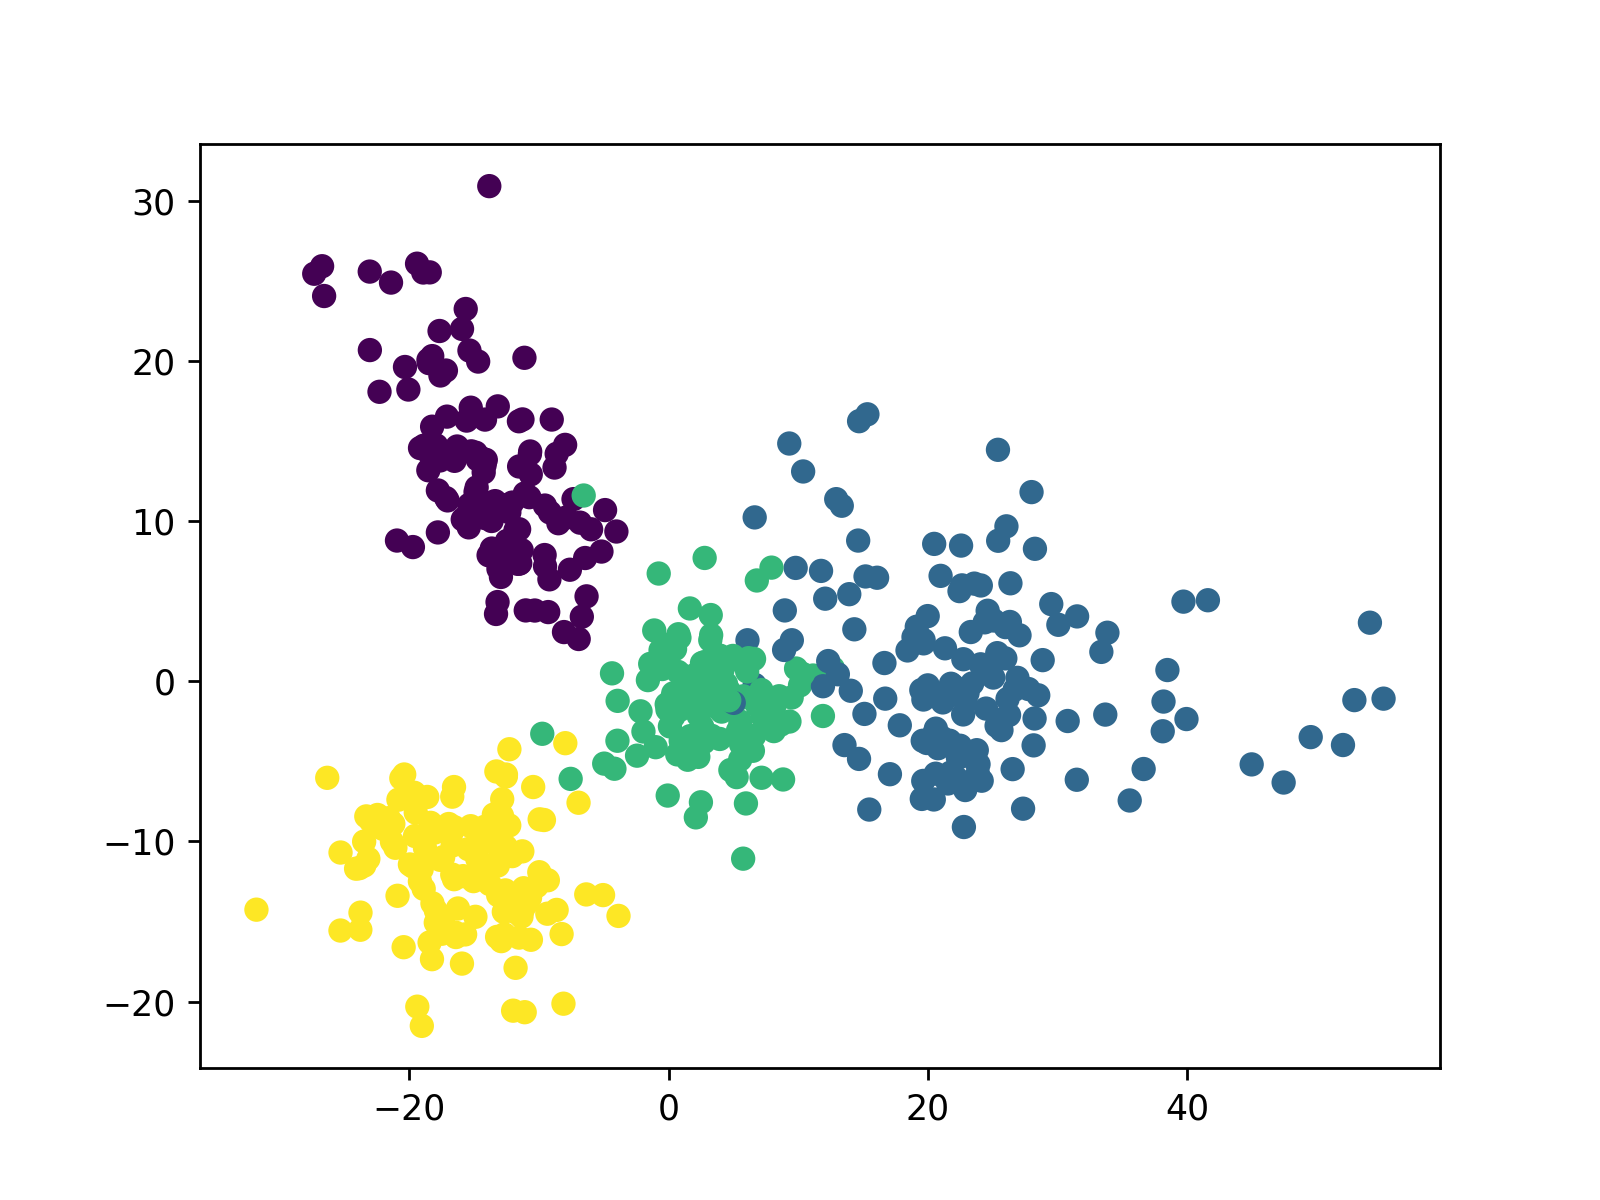

In [117]:
print("=========================3.1.2===============================")
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def PcaPlotSRI_3D(SRI_new, color):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(SRI_new[:, 0], SRI_new[:, 1], SRI_new[:, 2],c=color,cmap='viridis')
    plt.show()
def PcaPlotSRI_2D(SRI_new, color):
    fig = plt.figure()
    plt.scatter(SRI_new[:, 0], SRI_new[:, 1],c=color,cmap='viridis')
    plt.show()    
def pcaDecompositionFunction(SRItrain,SRItest,component):
    pca = PCA(n_components=component)
    pca.fit(SRItrain)
    pca.fit(SRItest)
    print ("****************************************************")
    print ("dimension:",component)
    print("cumulative explained variance=",pca.explained_variance_ratio_.sum())
    print ("explained_variance_ratio=",pca.explained_variance_ratio_)
    print ("explained_variance_=",pca.explained_variance_)
    print ("singular_values_",pca.singular_values_)
    trainN = SRItrain.shape[0]
    SRI_train_new = pca.transform(SRItrain)
    SRI_test_new = pca.transform(SRItest)
    if component==2:
        PcaPlotSRI_2D(SRI_test_new,loctest)    
    if component==3:
        PcaPlotSRI_3D(SRI_test_new,loctest)
    return SRI_train_new, SRI_test_new
#7D 
SRItrain_pca7,SRItest_pca7 = pcaDecompositionFunction(SRItrain,SRItest,7)
#7D to 4D
SRItrain_pca4,SRItest_pca4 = pcaDecompositionFunction(SRItrain,SRItest,4)
#7D to 3D
SRItrain_pca3,SRItest_pca3 = pcaDecompositionFunction(SRItrain,SRItest,3)
#7D to 2D
SRItrain_pca2,SRItest_pca2 = pcaDecompositionFunction(SRItrain,SRItest,2)

In [118]:
print("=========================3.1.3===============================")
def pcaKmeans(SRItrain_pca,SRItest_pca,component):
    print ("****************************************************")
    print ("dimension:",component)
    kmeans = KMeans(n_clusters=4, random_state=10).fit(SRItrain_pca)
    y_pred=kmeans.predict(SRItest_pca)
    adjustedMutualScore = metrics.adjusted_mutual_info_score(loctest, y_pred)
    print("adjustedMutualScore = ",adjustedMutualScore)
#     if component==2:
#         PcaPlotSRI_2D(SRItest_pca,y_pred)    
#     if component==3:
#         PcaPlotSRI_3D(SRItest_pca,y_pred)
pcaKmeans(SRItrain_pca7,SRItest_pca7, 7)
pcaKmeans(SRItrain_pca4,SRItest_pca4, 4)
pcaKmeans(SRItrain_pca3,SRItest_pca3, 3)
pcaKmeans(SRItrain_pca2,SRItest_pca2, 2)

=========================3.1.3===============================
****************************************************
dimension: 7
adjustedMutualScore =  0.871593908872885
****************************************************
dimension: 4
adjustedMutualScore =  0.8690706619064258
****************************************************
dimension: 3


C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


adjustedMutualScore =  0.8777363898332656
****************************************************
dimension: 2
adjustedMutualScore =  0.880249534583556


C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# Section 4: Support Vector Machines (SVMs)

We have covered the theory of [SVMs](https://en.wikipedia.org/wiki/Support-vector_machine) during the lectures. It is now time to see SVMs in action! It is appropriate to start with a noisy moon data set. We will use [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) library.

C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


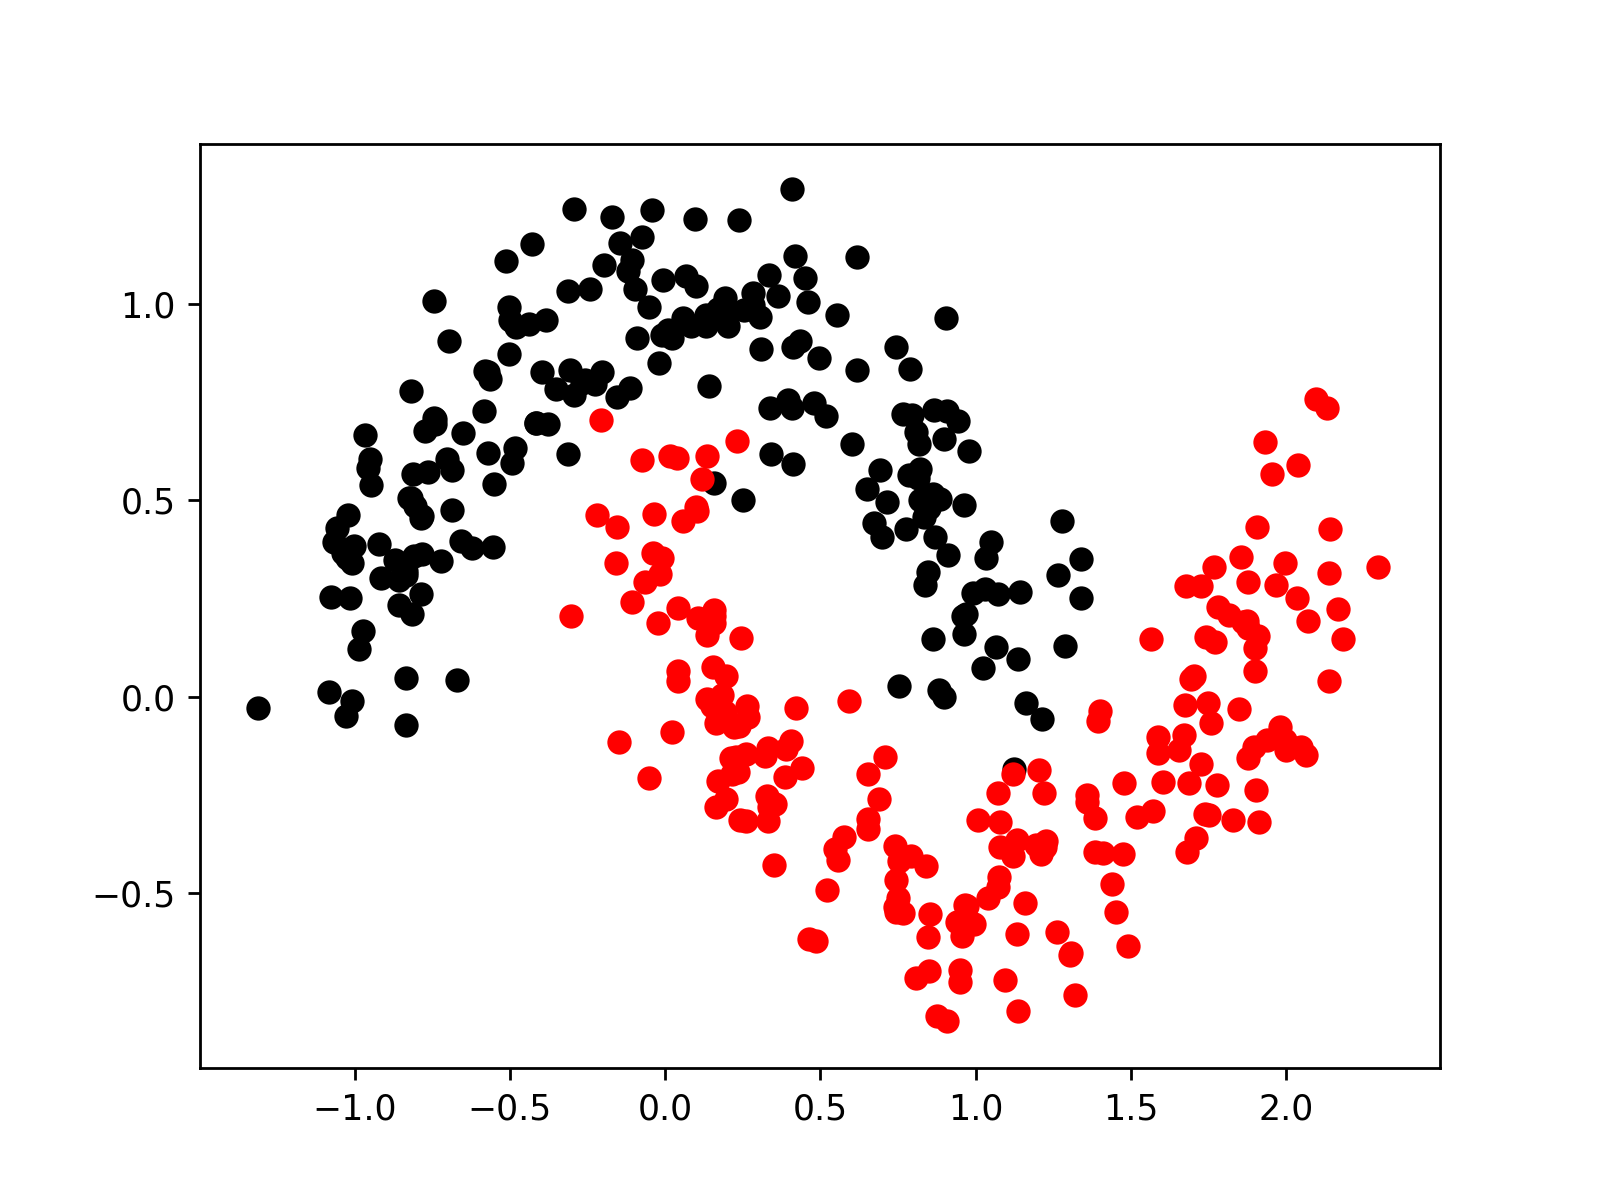

In [119]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics

# helper function to visualise decision boundary, uses the svm model as input
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# Create a new moons data set
new_moons = datasets.make_moons(n_samples=400, noise=0.15)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(Xm1[:,0], Xm1[:,1], color='black')
plt.scatter(Xm2[:,0], Xm2[:,1], color='red')
plt.show()

### Question 4.1.  Binary SVM Classifiers (6 pts)

First divide the data $(Xm,ym)$ to training and test sets using the default ratio. The range of data values is OK so you can skip data normalisation for this one.

1. Try an [SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with a linear kernel and different C parameters. Plot the test output and boundary. Discuss your observations and comment on linear separability of this data. Provide the precision, recall, and F-score metrics. *Hint: see [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), especially [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)*
2. Next, use an [RBF kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) and repeat the first part for different C and gamma parameters. Do you observe an improvement compared to linear version (both visually and in terms of scores)? Discuss your results.
3. Perform a cross-validated grid-search over a parameter grid to find good C and gamma hyper-parameters. Plot the AUC ('mean_train_AUC') vs gamma for the best C. *Hint: check [GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py) and [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). Note that you should use semi-log plot!*

**Answer as text here**
1. We can see that when C is small, the boudary is wider, and when C is large the boudary is narrower. The scores are similar for large and small C. Linear seperation is not a great classifier for this model, since we can see the two moons are curve, so it's can't be seperate clearly by a straight line.
2. Yes, we can see that the model's boundary is a curve which better fits the curve shape data sets and the scores also improve a lot. And by varying C and gamma, we can see the boundary starts to change and there exists boundary that perfectly fit the data sets but it could lead to overfit. We found that when we fix gamma and increase C, the score first increase then decrease, because C control the regularisation, when C is large is more likely to overfit and when C is small is underfit. When we fix C and vary gamma we have similar results, because gamma control the varience, bigger gamma leads to smaller varience, so it's more likely to overfit.
3. First we apply the grid-search to find the best parameter C, then we fix C and vary gamma, use function roc_auc() to compute the mean AUC and plot it. From the plot, we can find which gamma leads to largest AUC and larger AUC means better performance, because AUC is the area under the ROC curve. 

=========================4.1.1===============================
SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


<IPython.core.display.Javascript object>


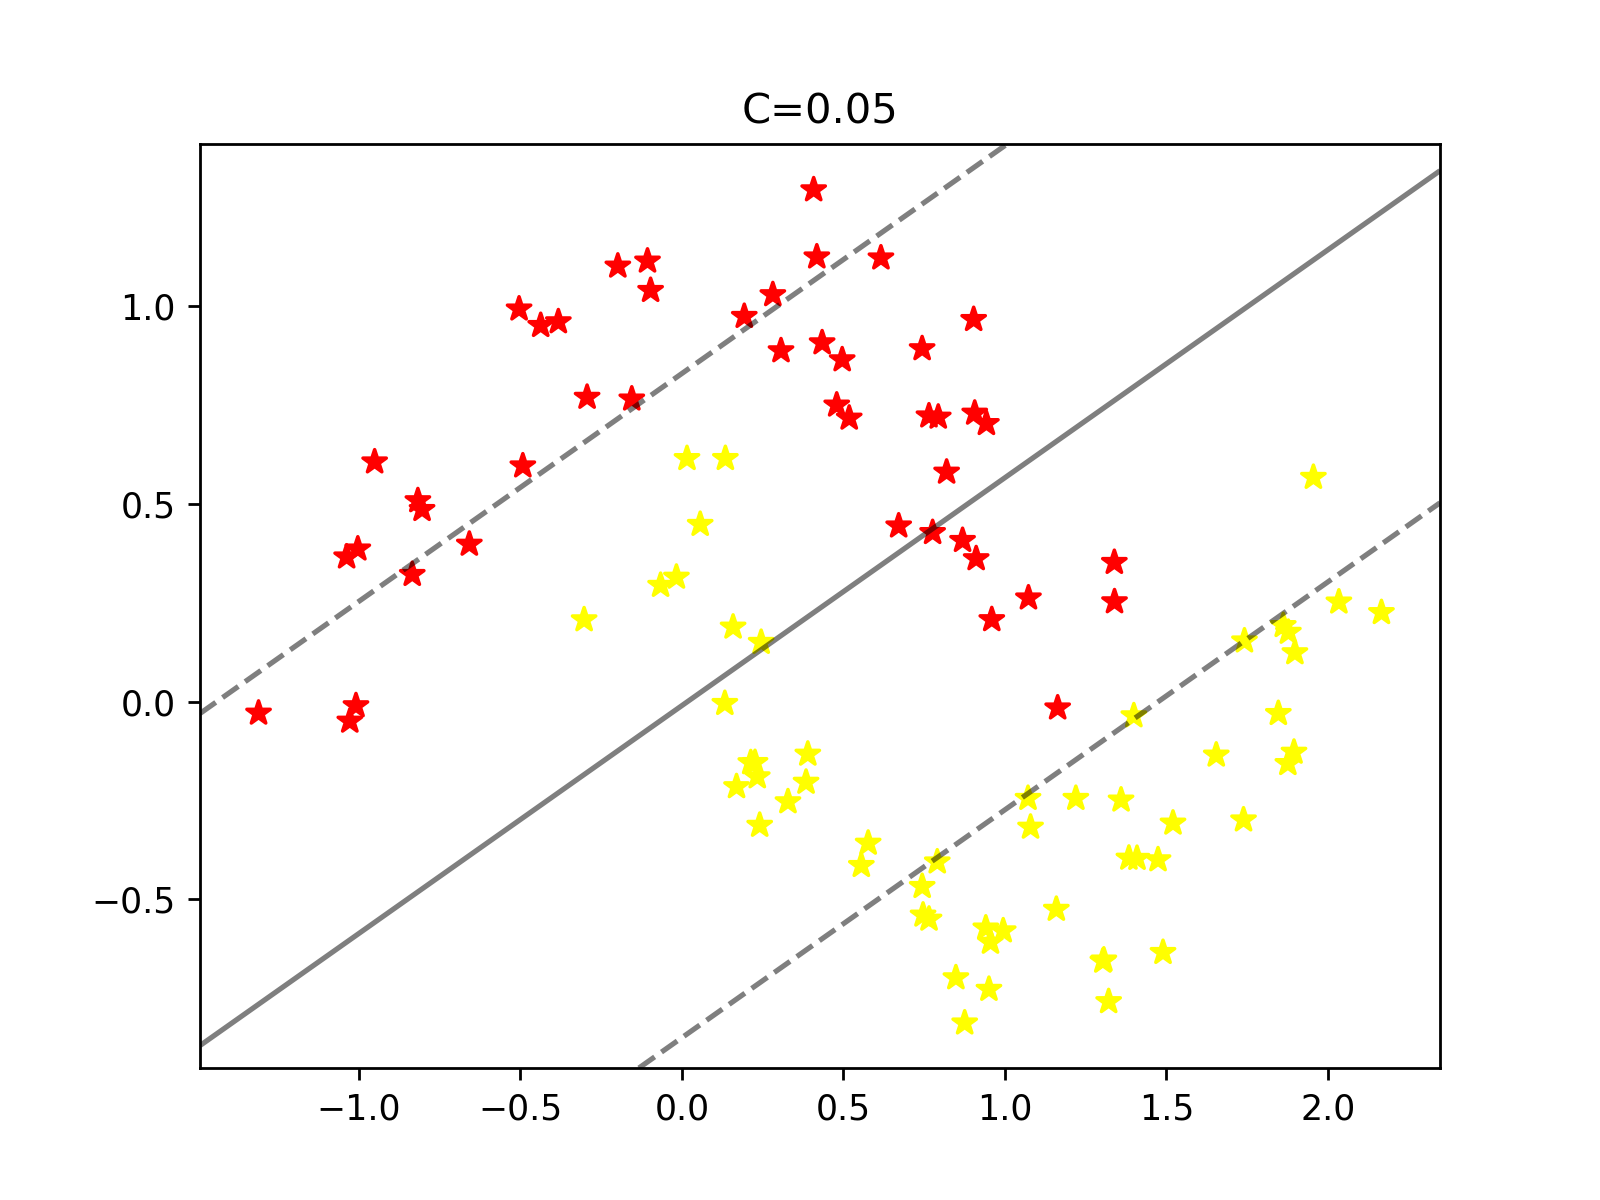

              precision    recall  f1-score   support

     class 0       0.82      0.82      0.82        45
     class 1       0.85      0.85      0.85        55

   micro avg       0.84      0.84      0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


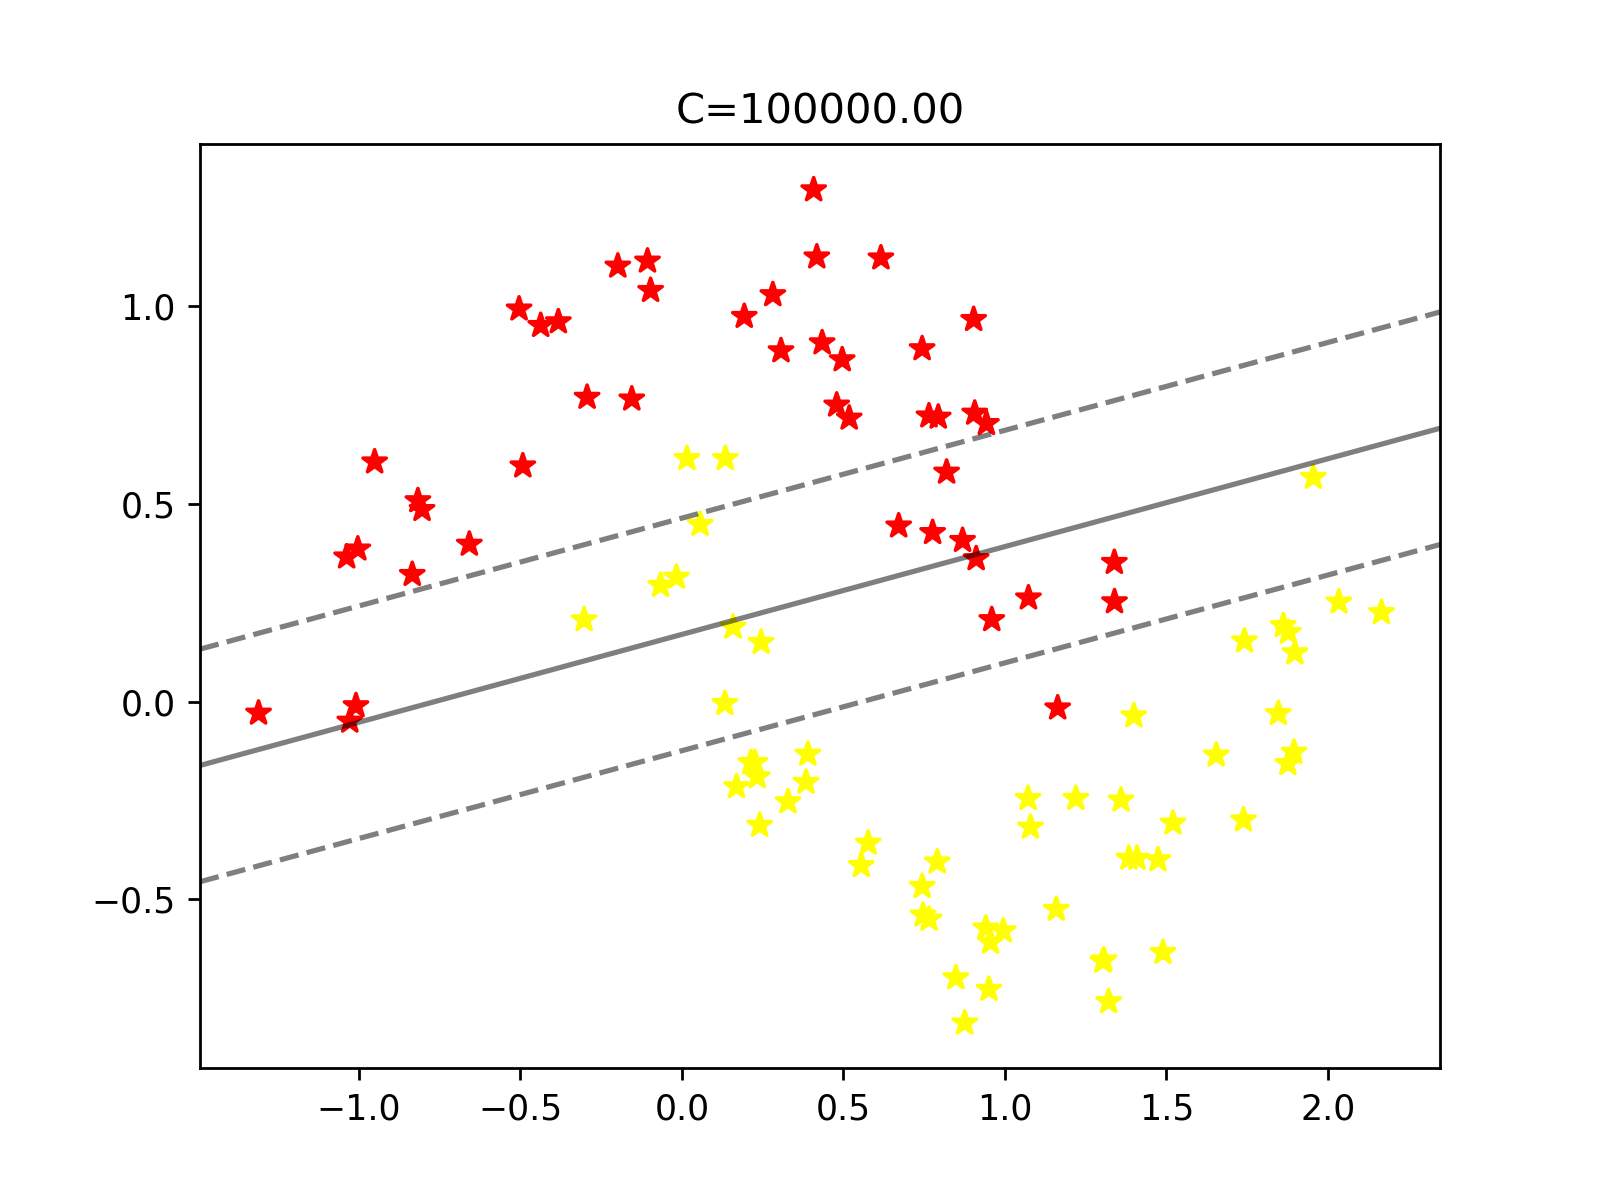

              precision    recall  f1-score   support

     class 0       0.87      0.87      0.87        45
     class 1       0.89      0.89      0.89        55

   micro avg       0.88      0.88      0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [120]:
print("=========================4.1.1===============================")
#divide the data to training and test sets using the default ratio
X_train, X_test, y_train, y_test = train_test_split(Xm, ym)

#Use linear kernel and differenct C parameters
for c_param in (0.05, 1e5):
    #train SVM model
    model = svm.SVC(kernel='linear',C=c_param)
    print(model)
    model.fit(X_train, y_train)  
    #plot decision function
    plt.figure()
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50, cmap='autumn', marker = '*')
    plot_svc_decision_function(model)
    plt.title("C=%.2f" %(c_param))
    #classification report
    y_pred = model.predict(X_test)
    target_names = ['class 0', 'class 1']
    print(metrics.classification_report(y_test, y_pred, target_names=target_names))

=========================4.1.2===============================
SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(300, 2)


<IPython.core.display.Javascript object>


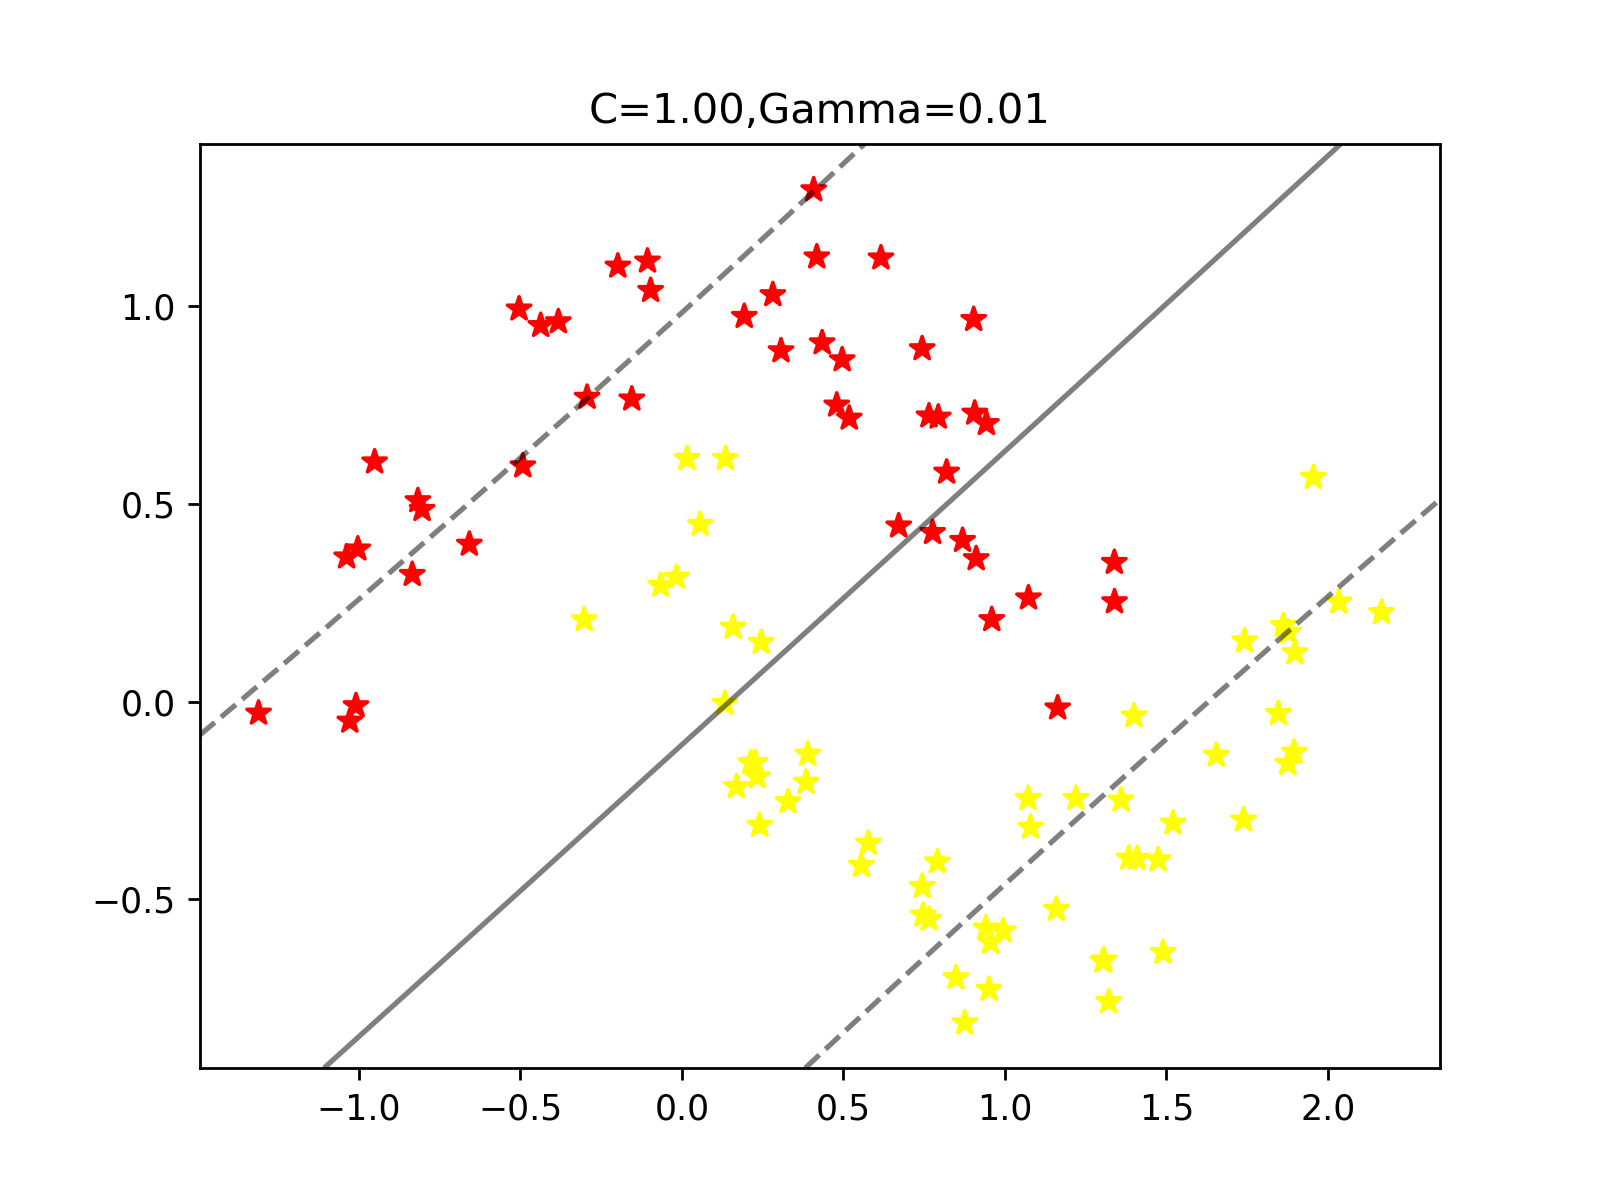

              precision    recall  f1-score   support

     class 0       0.80      0.82      0.81        45
     class 1       0.85      0.84      0.84        55

   micro avg       0.83      0.83      0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(300, 2)


<IPython.core.display.Javascript object>


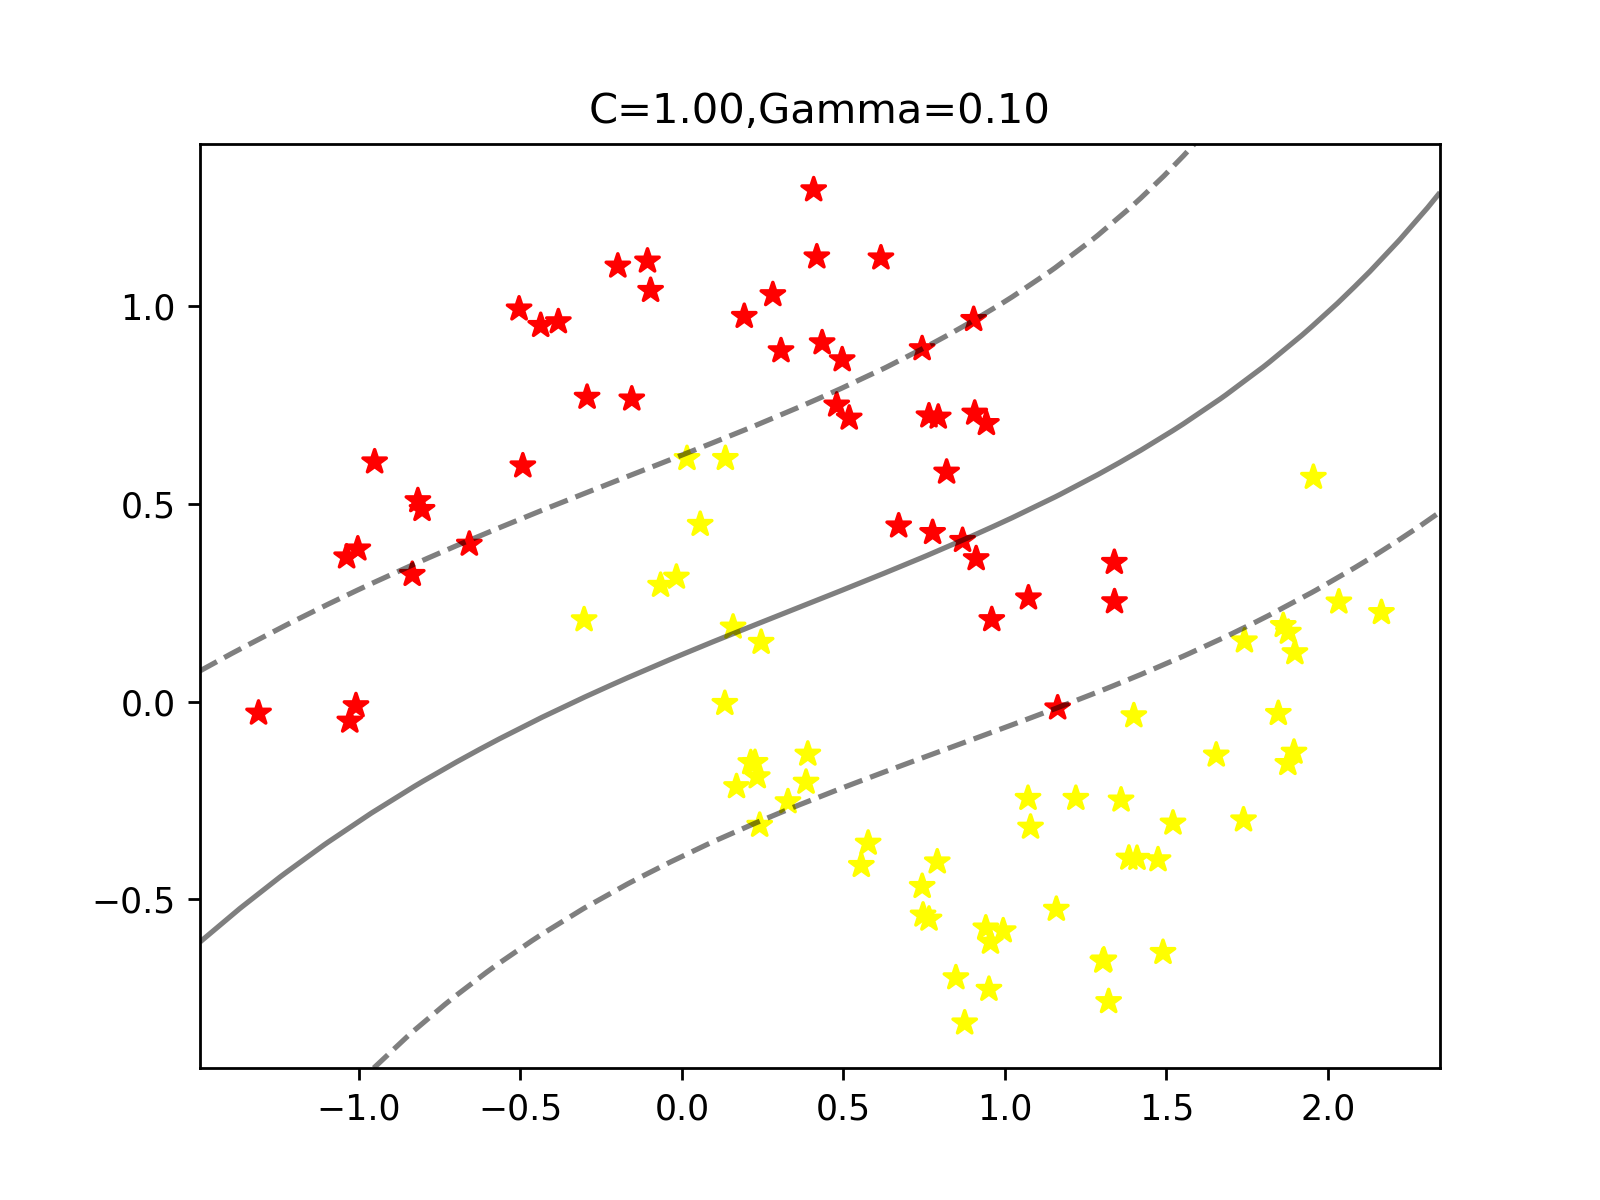

              precision    recall  f1-score   support

     class 0       0.84      0.84      0.84        45
     class 1       0.87      0.87      0.87        55

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(300, 2)


<IPython.core.display.Javascript object>


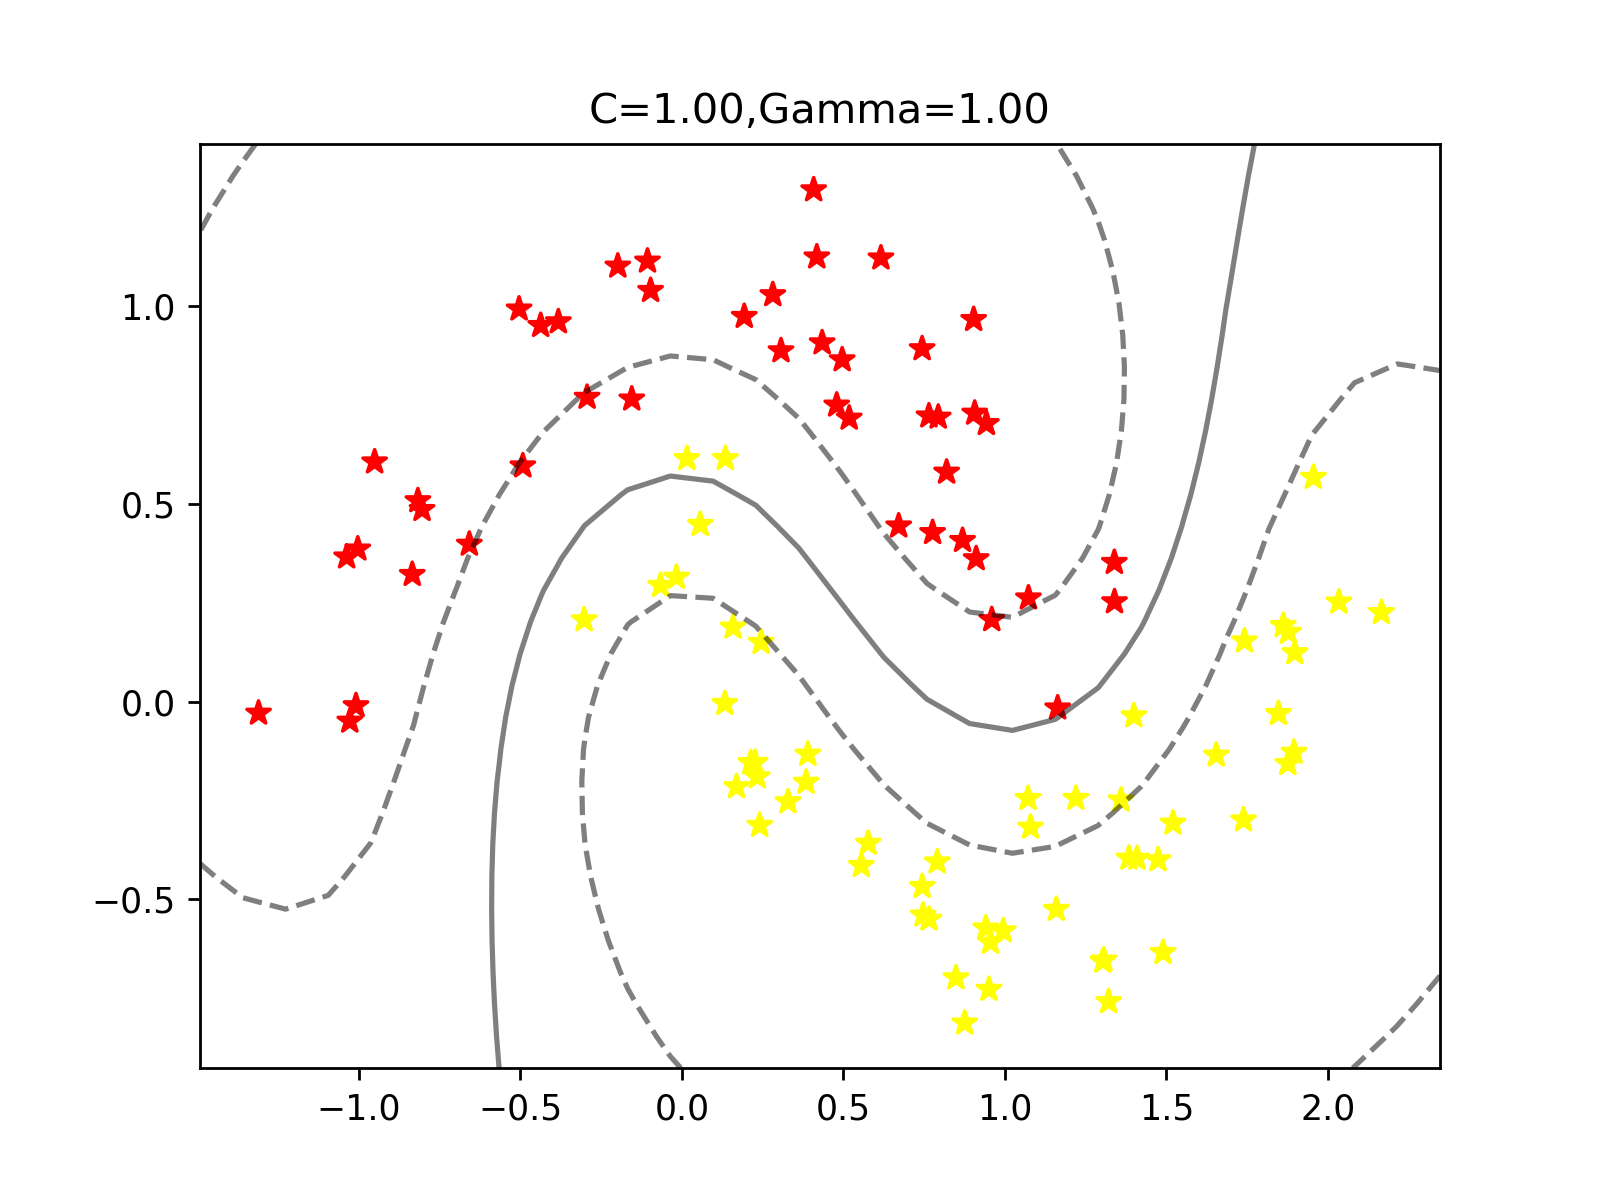

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        45
     class 1       1.00      0.96      0.98        55

   micro avg       0.98      0.98      0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(300, 2)


<IPython.core.display.Javascript object>


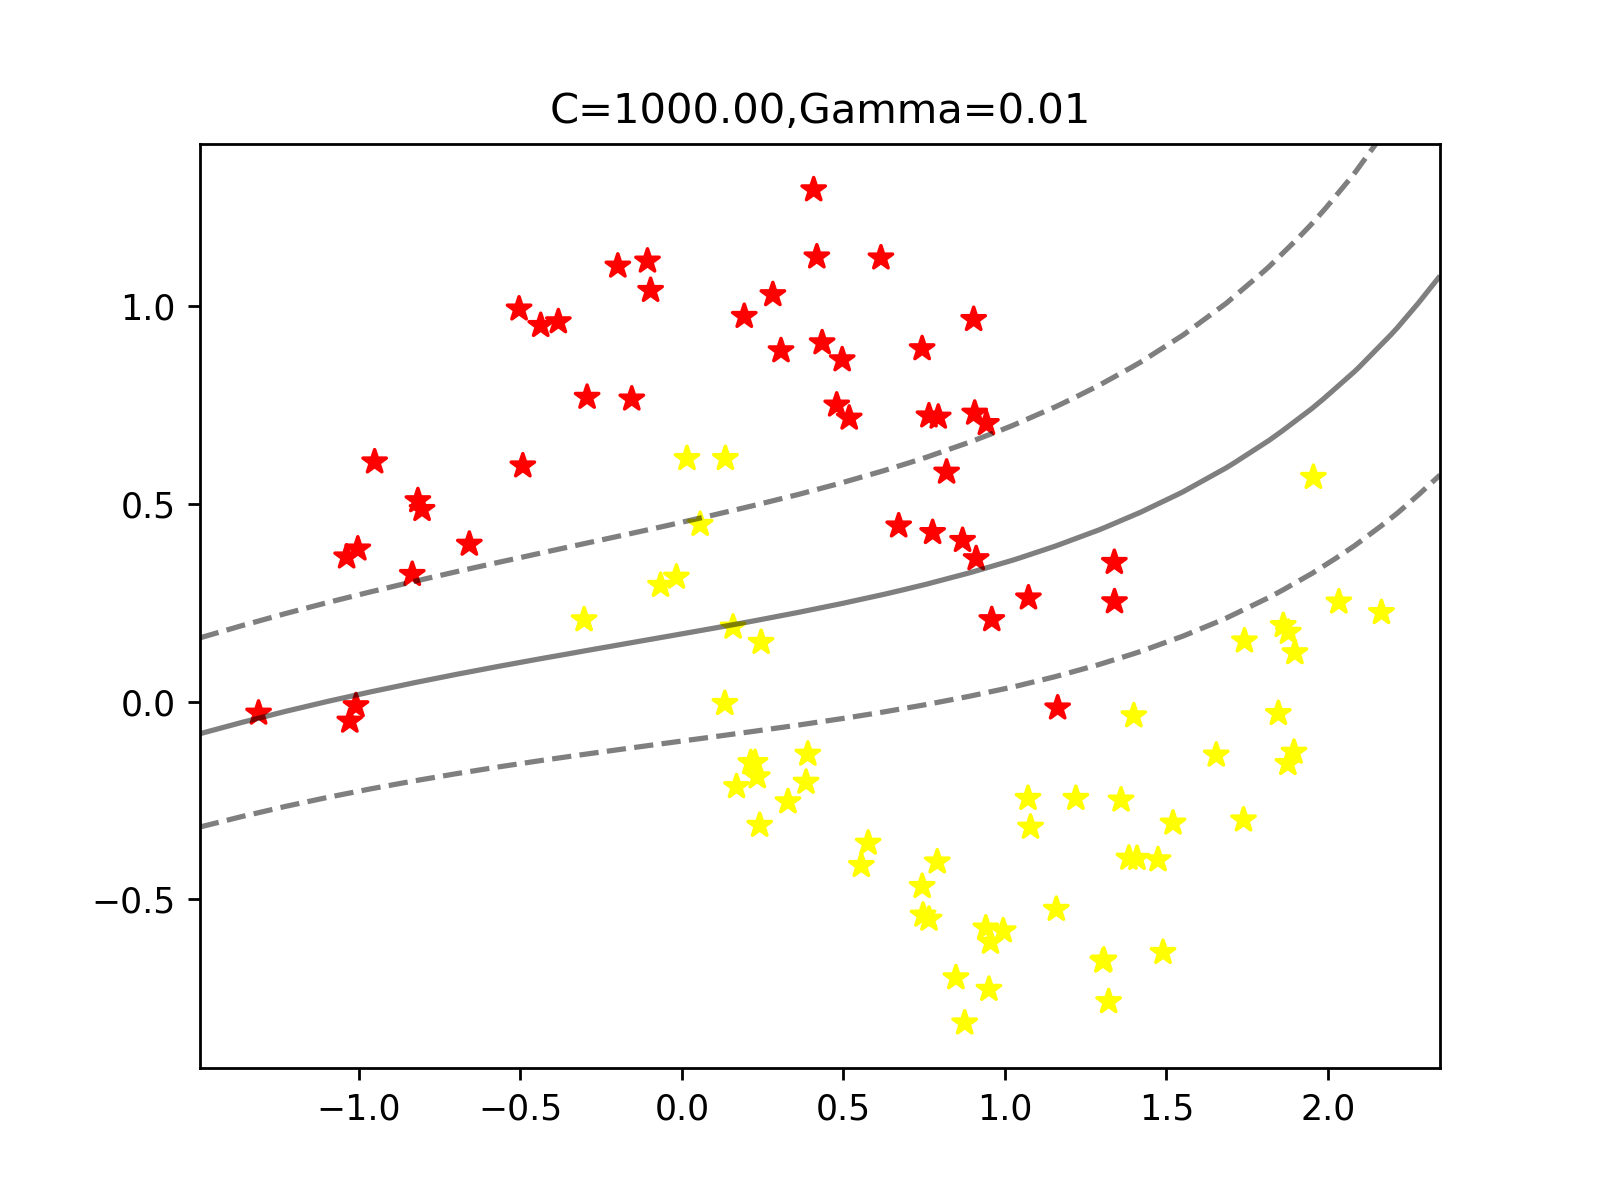

              precision    recall  f1-score   support

     class 0       0.86      0.84      0.85        45
     class 1       0.88      0.89      0.88        55

   micro avg       0.87      0.87      0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(300, 2)


<IPython.core.display.Javascript object>


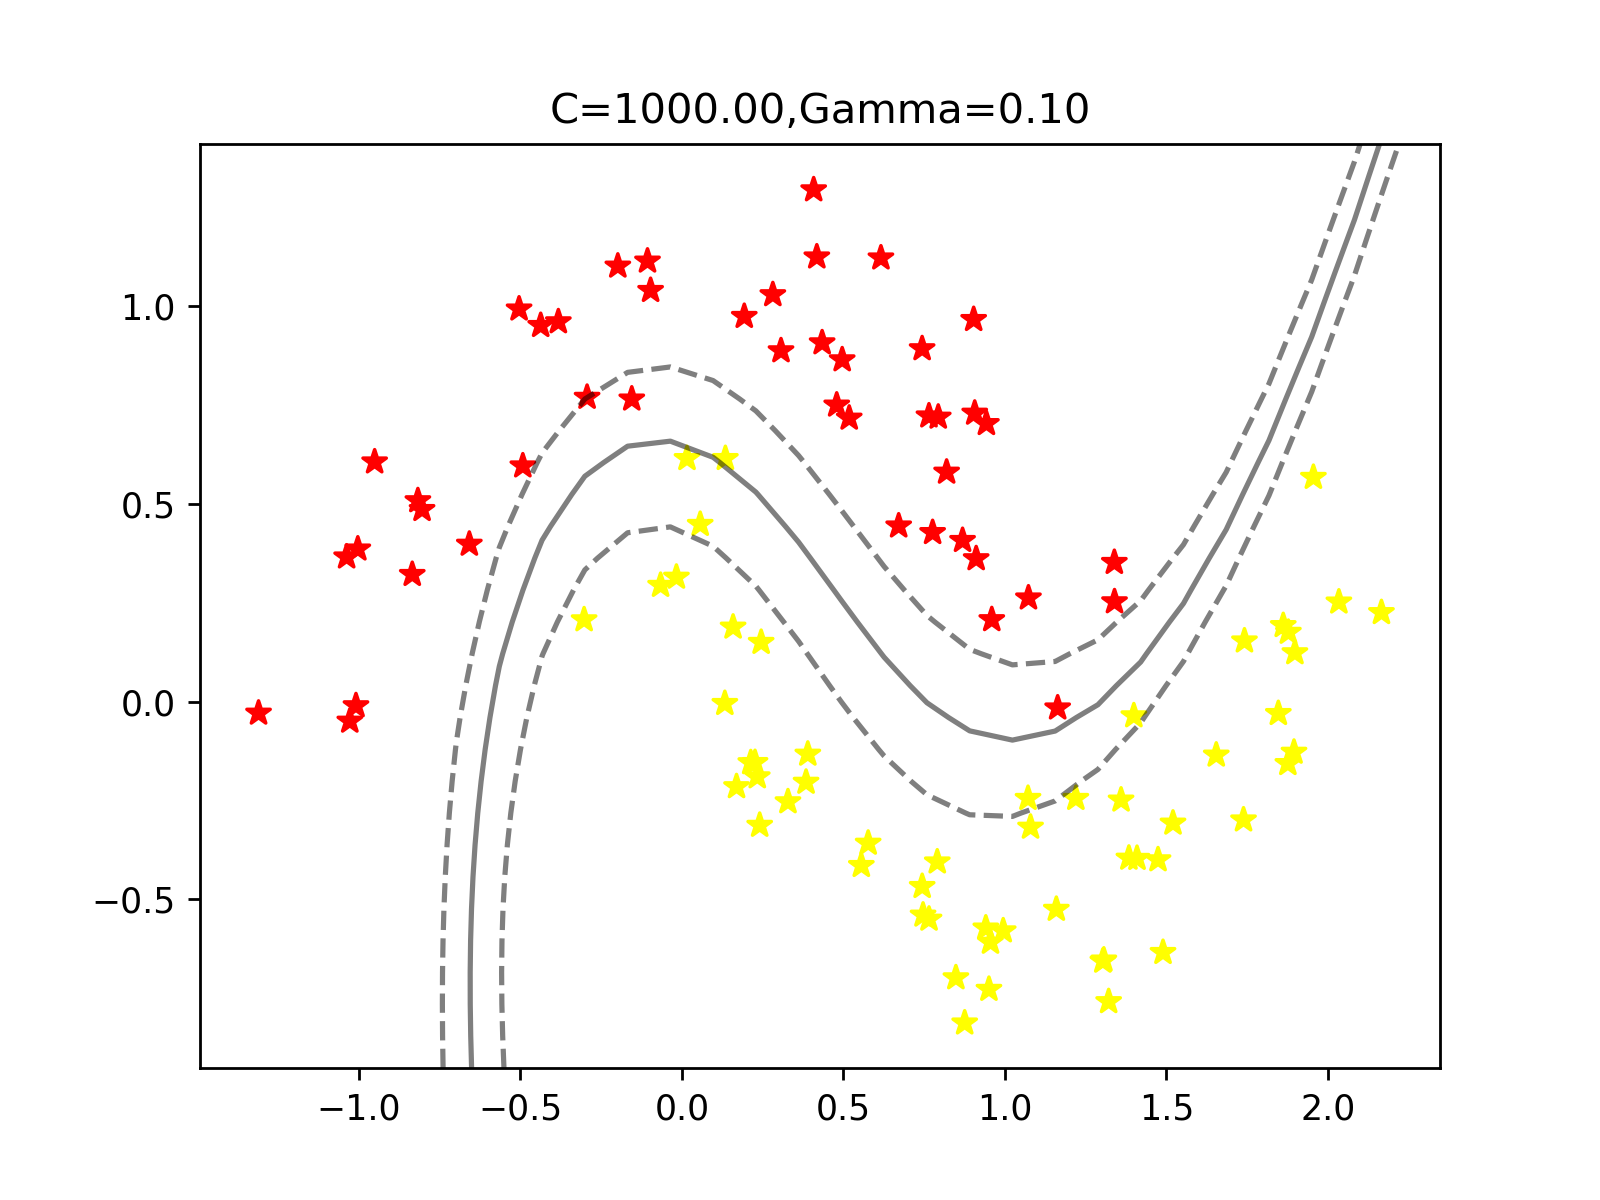

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99        45
     class 1       1.00      0.98      0.99        55

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
(300, 2)


C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


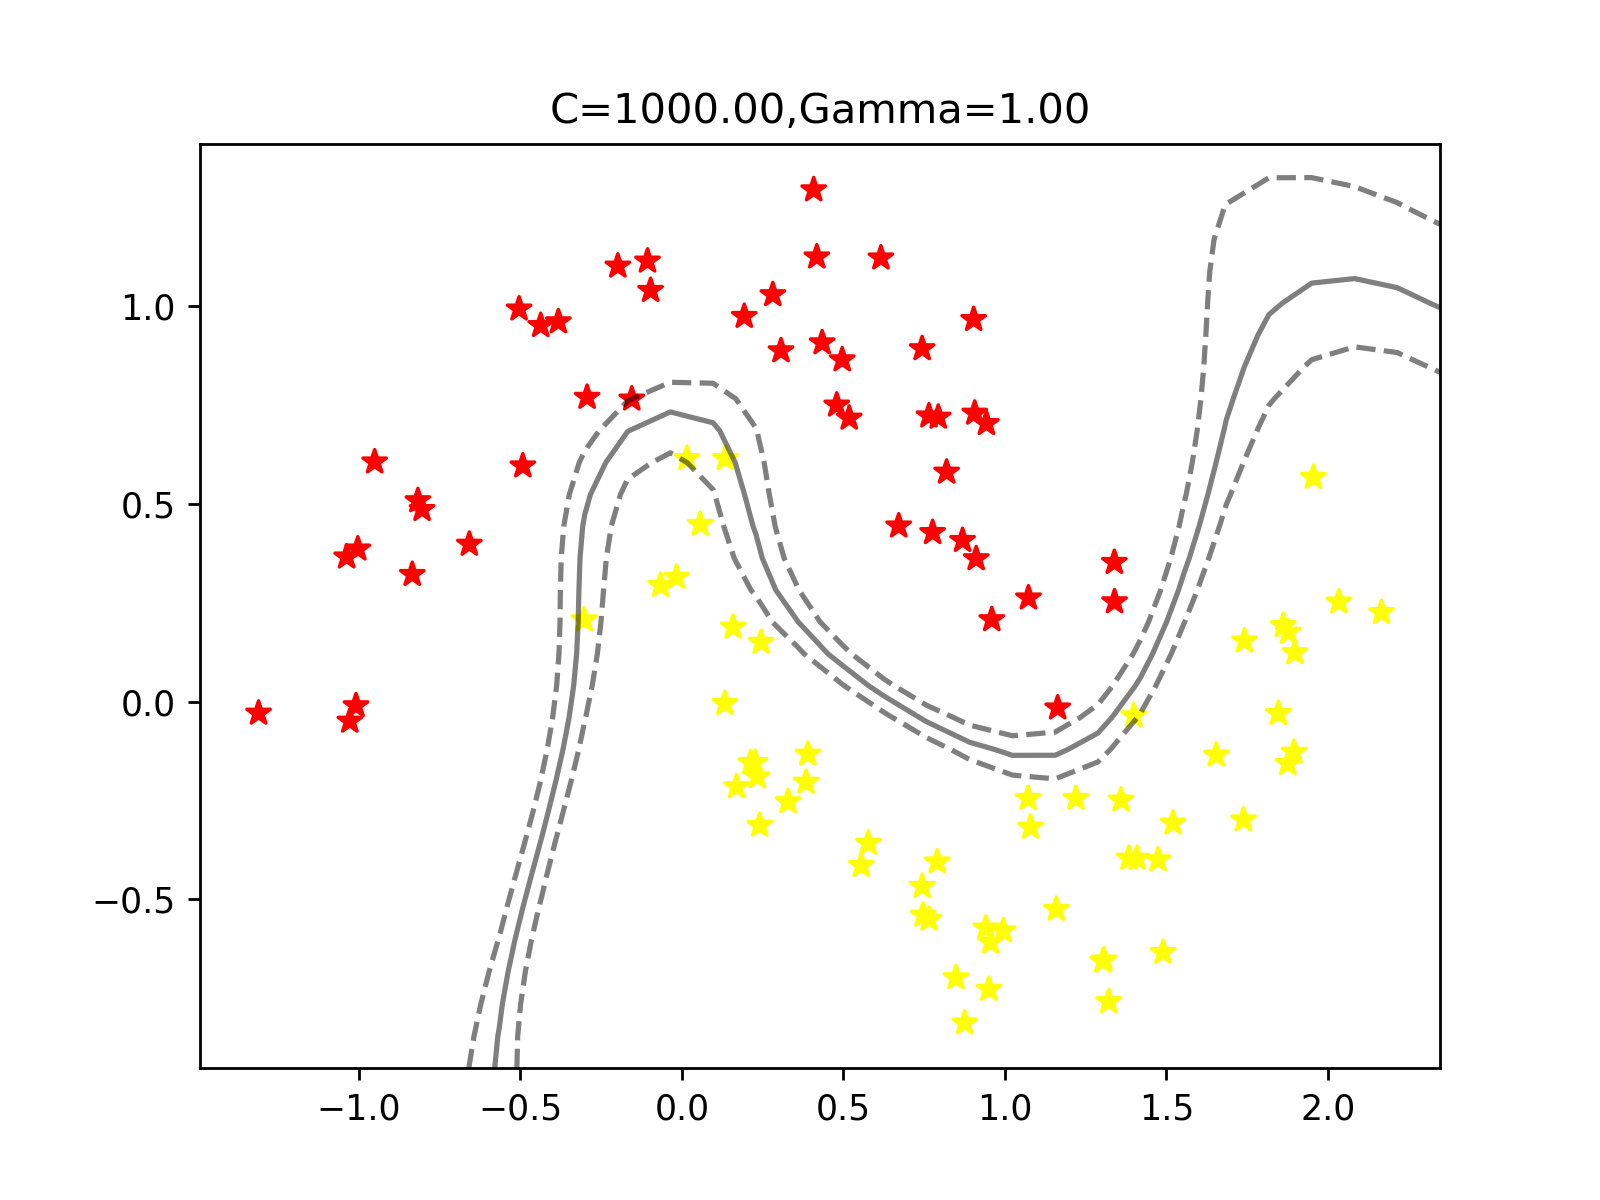

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        45
     class 1       1.00      1.00      1.00        55

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [121]:
print("=========================4.1.2===============================")
for c_param in (1, 1e3):
    for gamma_param in (0.01,0.1,1):
        #train SVM model
        model = svm.SVC(kernel='rbf',C=c_param,gamma=gamma_param, class_weight='balanced')
        print(model)
        model.fit(X_train, y_train)
  
        print(X_train.shape)
#         plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, cmap='autumn')
        plt.figure()
        plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50, cmap='autumn', marker = '*')
        plot_svc_decision_function(model)
        y_pred = model.predict(X_test)       
        plt.title("C=%.2f,Gamma=%.2f" %(c_param,gamma_param))
        target_names = ['class 0', 'class 1']
        print(metrics.classification_report(y_test, y_pred, target_names=target_names))

=========================4.1.3===============================
best C is: 4.641588833612782


C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


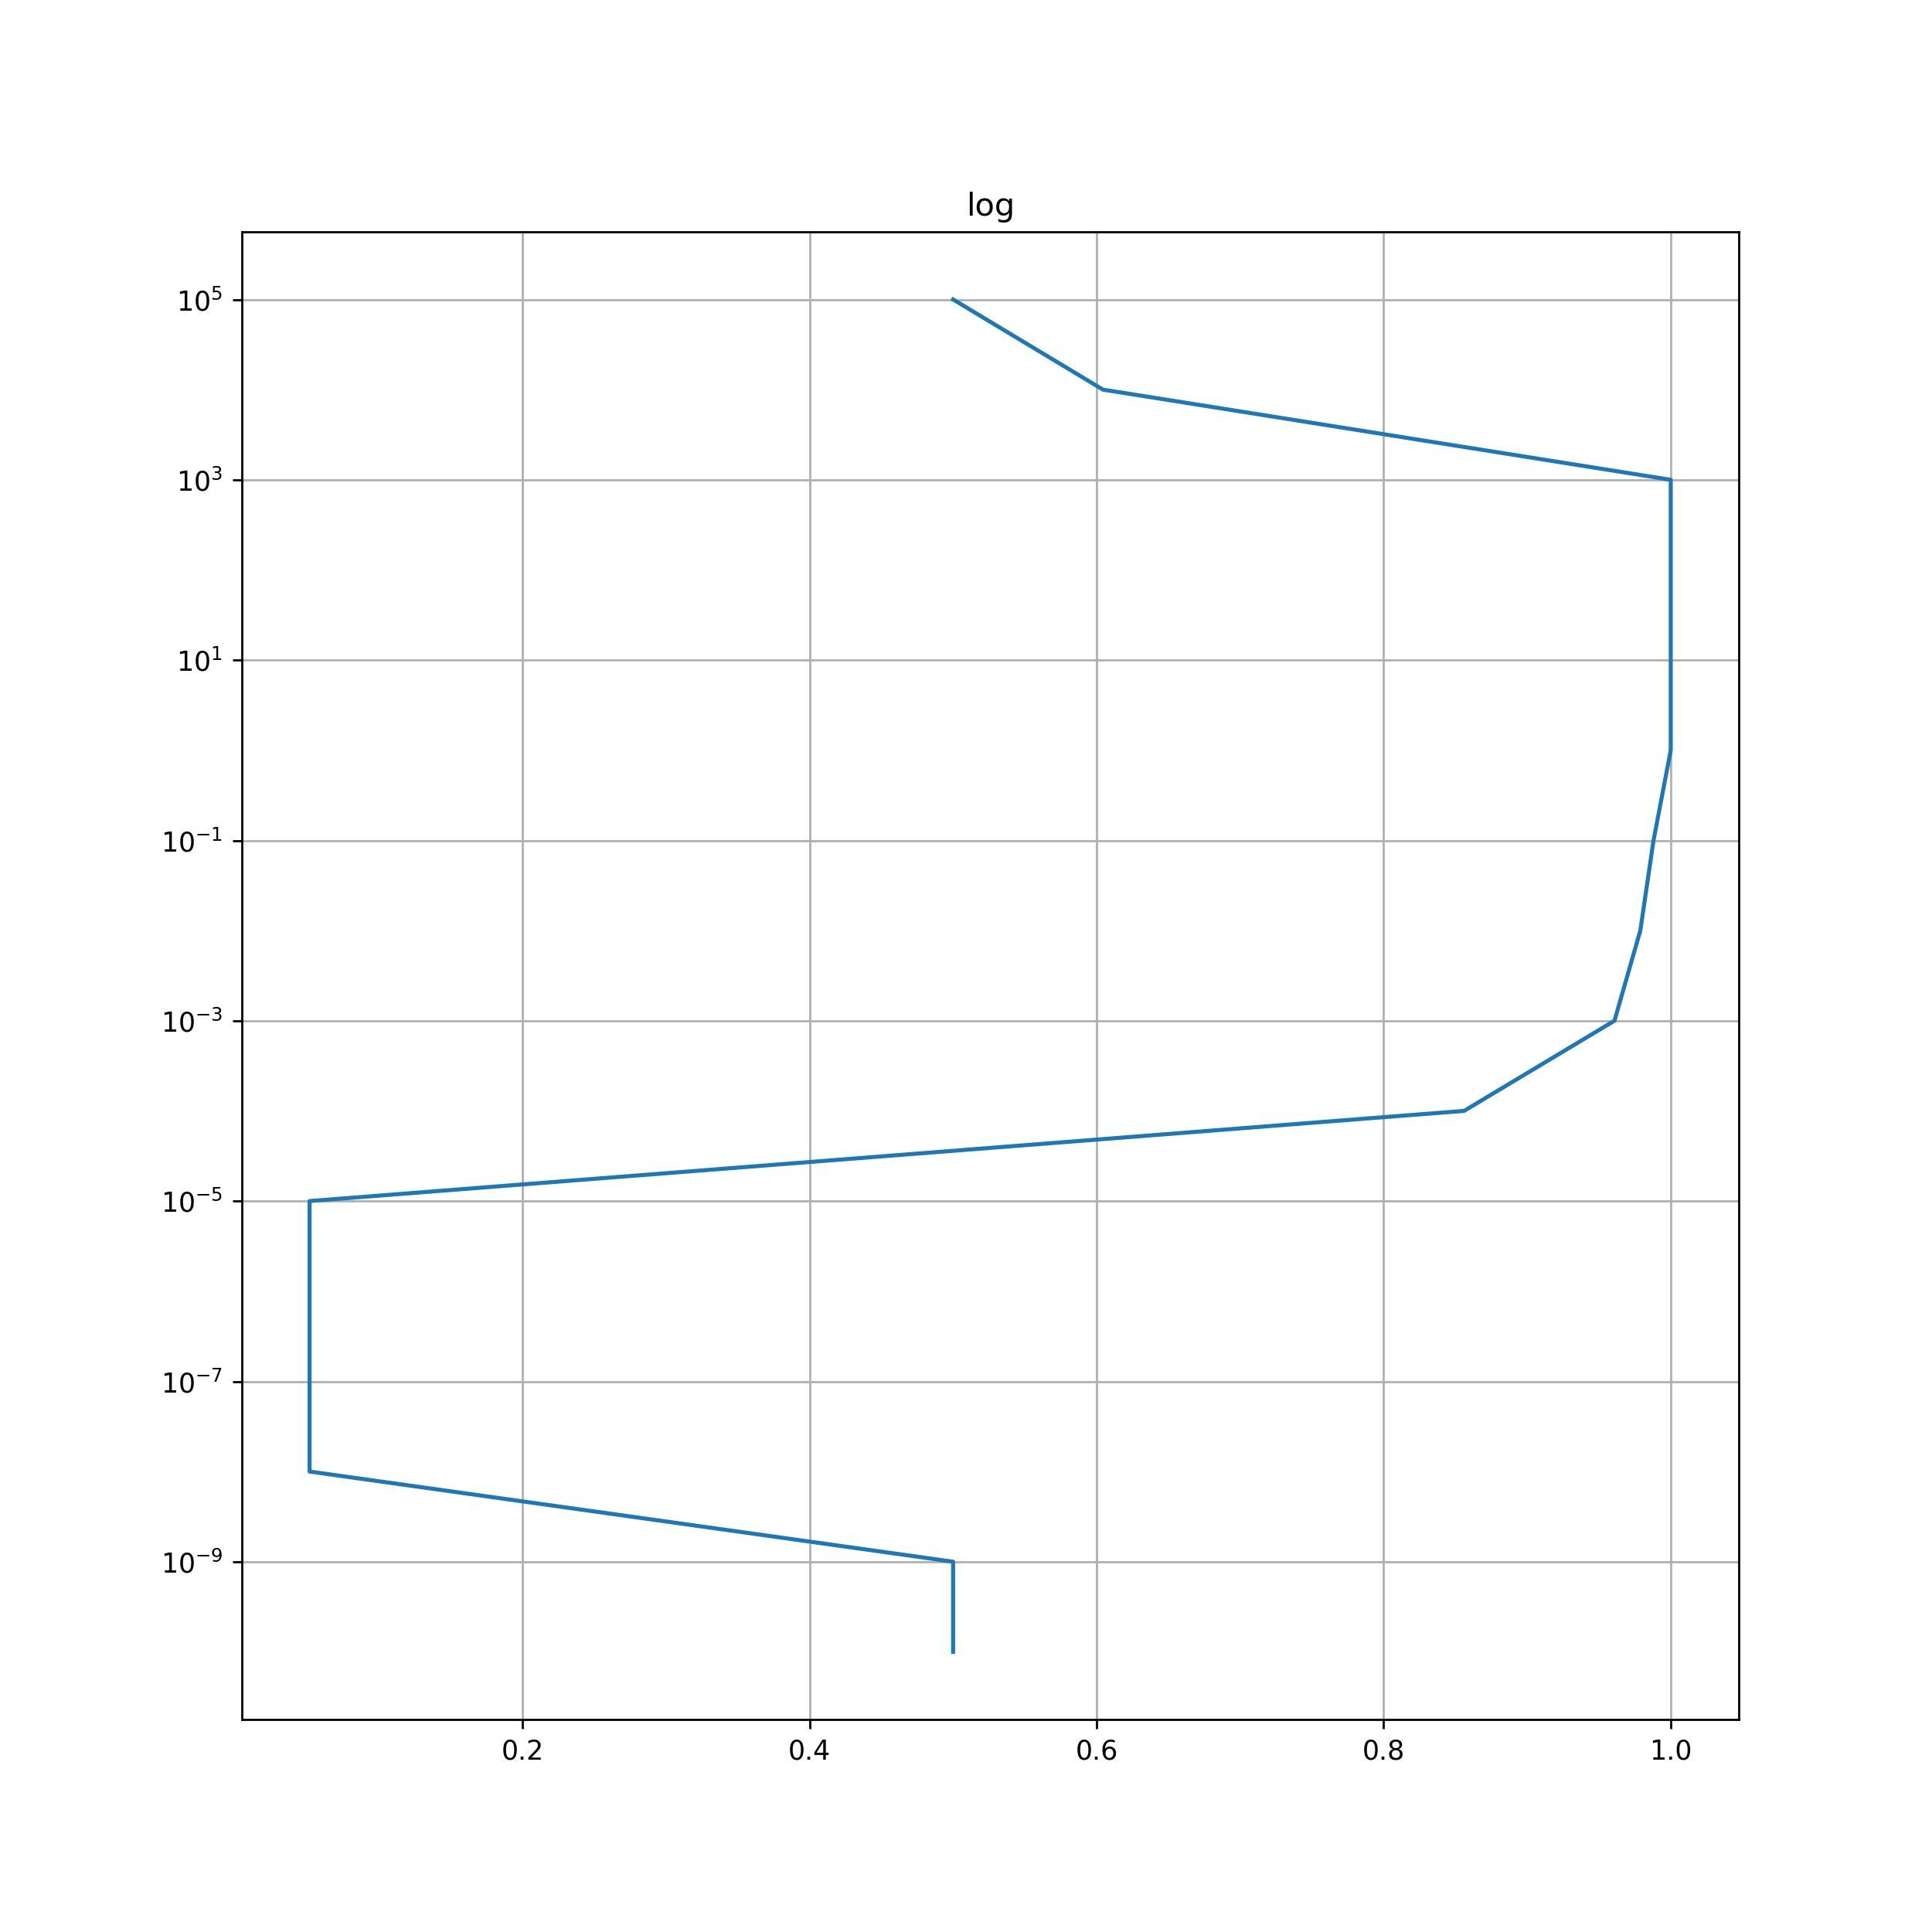

mean_aucs_list= [0.5, 0.5, 0.05160000000000001, 0.05160000000000001, 0.05160000000000001, 0.05160000000000001, 0.856, 0.9608, 0.9787999999999999, 0.988, 1.0, 1.0, 1.0, 1.0, 0.6044, 0.5]
gamma_range= [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [122]:
print("=========================4.1.3===============================")
from sklearn.metrics import roc_curve, auc
from scipy import interp

#split dataset
X_train, X_test, y_train, y_test = train_test_split(Xm, ym)

#Find the best value of C parameter
C_range = np.logspace(-4,3,40)
gamma_range = ['auto','scale']
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC('rbf',probability = True),  param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)    
bestC = grid.best_params_['C']
print("best C is:", bestC)
#iterate to compute AUC for different gamma    
i = 0
gamma_range = np.logspace(-10, 5, 16)
auc1_list = []
plt.figure(figsize=(10,10))
for gamma_para in gamma_range:
    model = svm.SVC(kernel='rbf',probability = True, C=bestC, gamma = gamma_para)
    ysolt = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute AUC
    auc1 = metrics.roc_auc_score(y_test, ysolt[:,1])
    i = i+1  
    auc1_list.append(auc1)


#semi-log plot gamma vs AUC     
# print("mean_aucs_list=",mean_aucs_list)
print("mean_aucs_list=",auc1_list)
print("gamma_range=",gamma_range)
  
plt.plot(auc1_list, gamma_range)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# Section 5: Logistic Regression

Logistic regression uses a linear statistical model. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. It is also used for classification. Let's start with a very simple example to **visualise the logistic function**.

C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


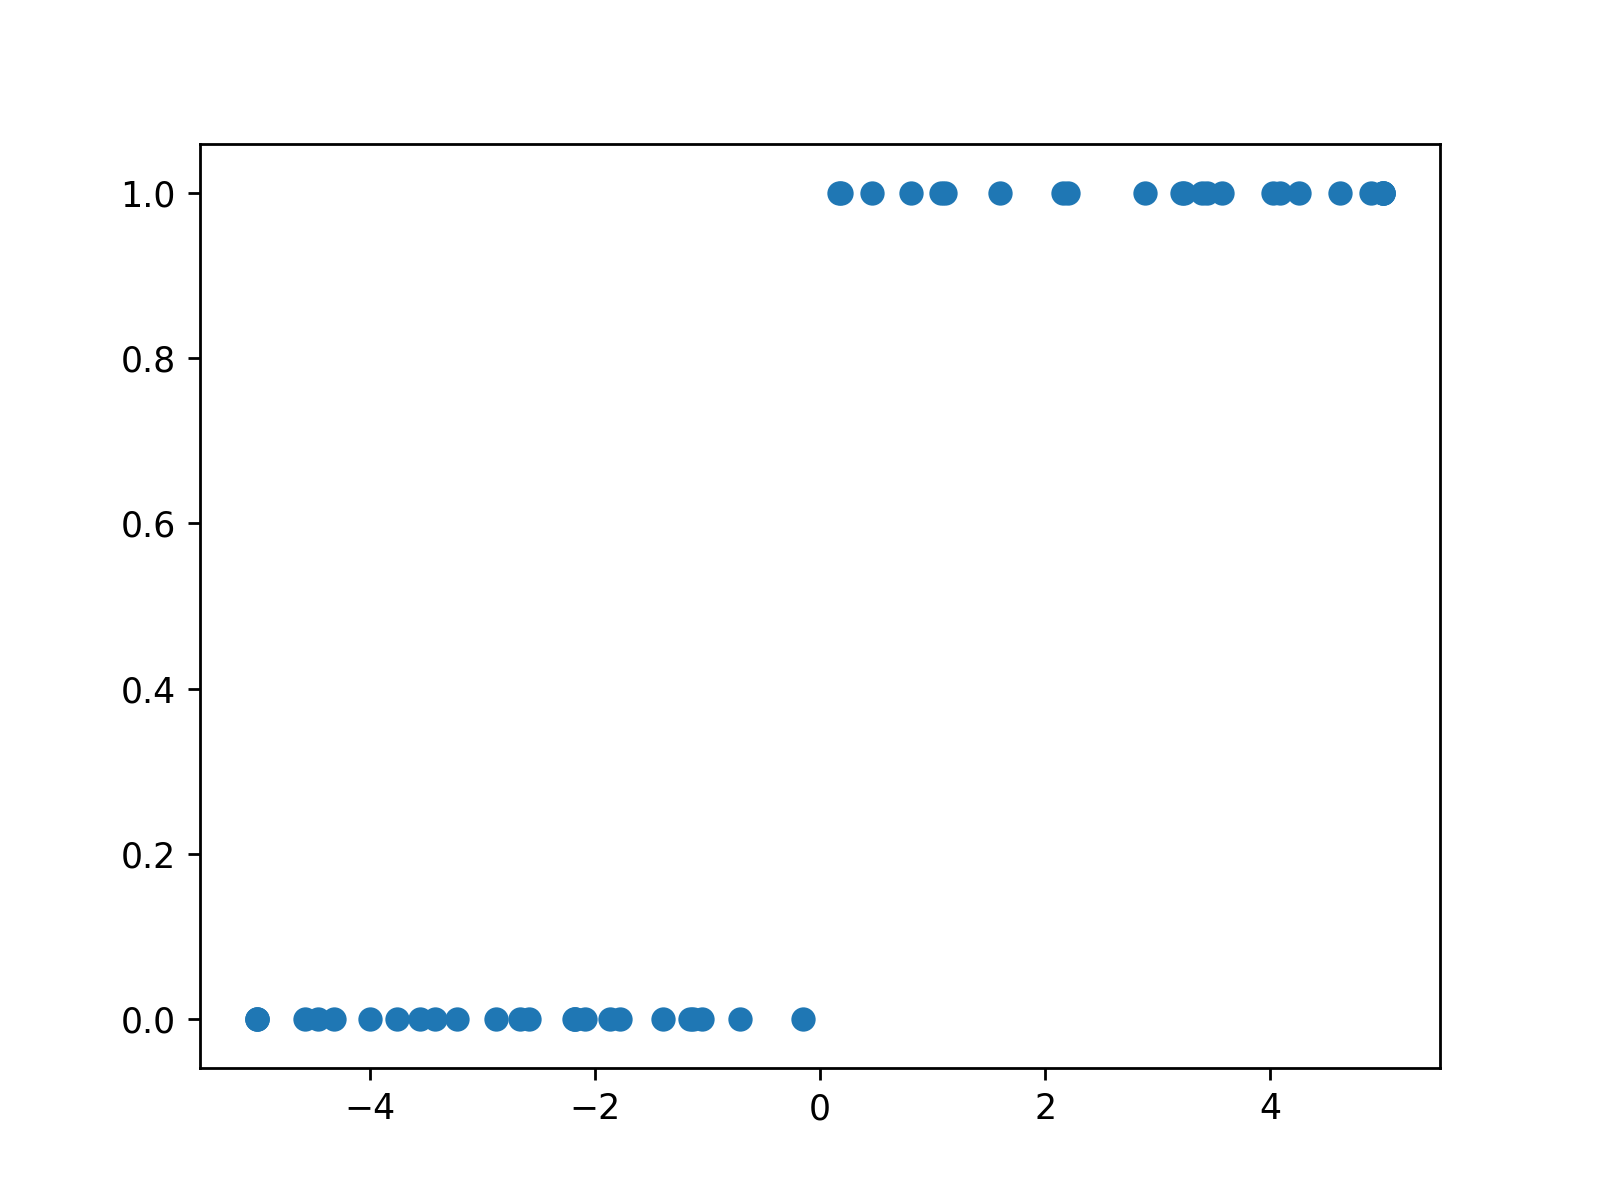

In [123]:
# Generate a toy dataset

toy_samples = 50
X_toy = np.linspace(-5, 5, toy_samples)
Xtoy_test = np.linspace(-5, 5, 200)
# gaussian noise added
X_toy = X_toy + 2*np.random.normal(size=toy_samples)
# upper, lower bound
X_toy = np.clip(X_toy,-5, 5).reshape(-1,1)
# create labels
y_toy = ((np.sign(X_toy)+1)/2.0).ravel()

# visualise
plt.figure()
plt.scatter(X_toy, y_toy)
plt.show()

### Question 5.1.  Simple Logistic Regression (LR) (2 pts)

1. (1 pt) Fit a logistic and linear regression model to the data *(X_toy, y_toy)*. Find the logistic and linear model coefficients and bias *(trained_model.coef_, trained_model.intercept_)*. Hint: check [Sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
2. (1 pts) Test your models on a simple test set {Xtoy_test} given above. Plot your results and discuss.

**Answer as text here**
2. From our results, we can see that the predictions matches the label, which is when X<0, y is 0, and when X>0, y is 1.

In [124]:
from sklearn.linear_model import LogisticRegression
print("=========================5.1.1===============================")
classifier=LogisticRegression()
classifier.fit(X_toy,y_toy)
print(classifier.coef_)
print(classifier.intercept_)

=========================5.1.1===============================
[[1.8965284]]
[0.14509505]


C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=========================5.1.2===============================


C:\Users\Yue\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


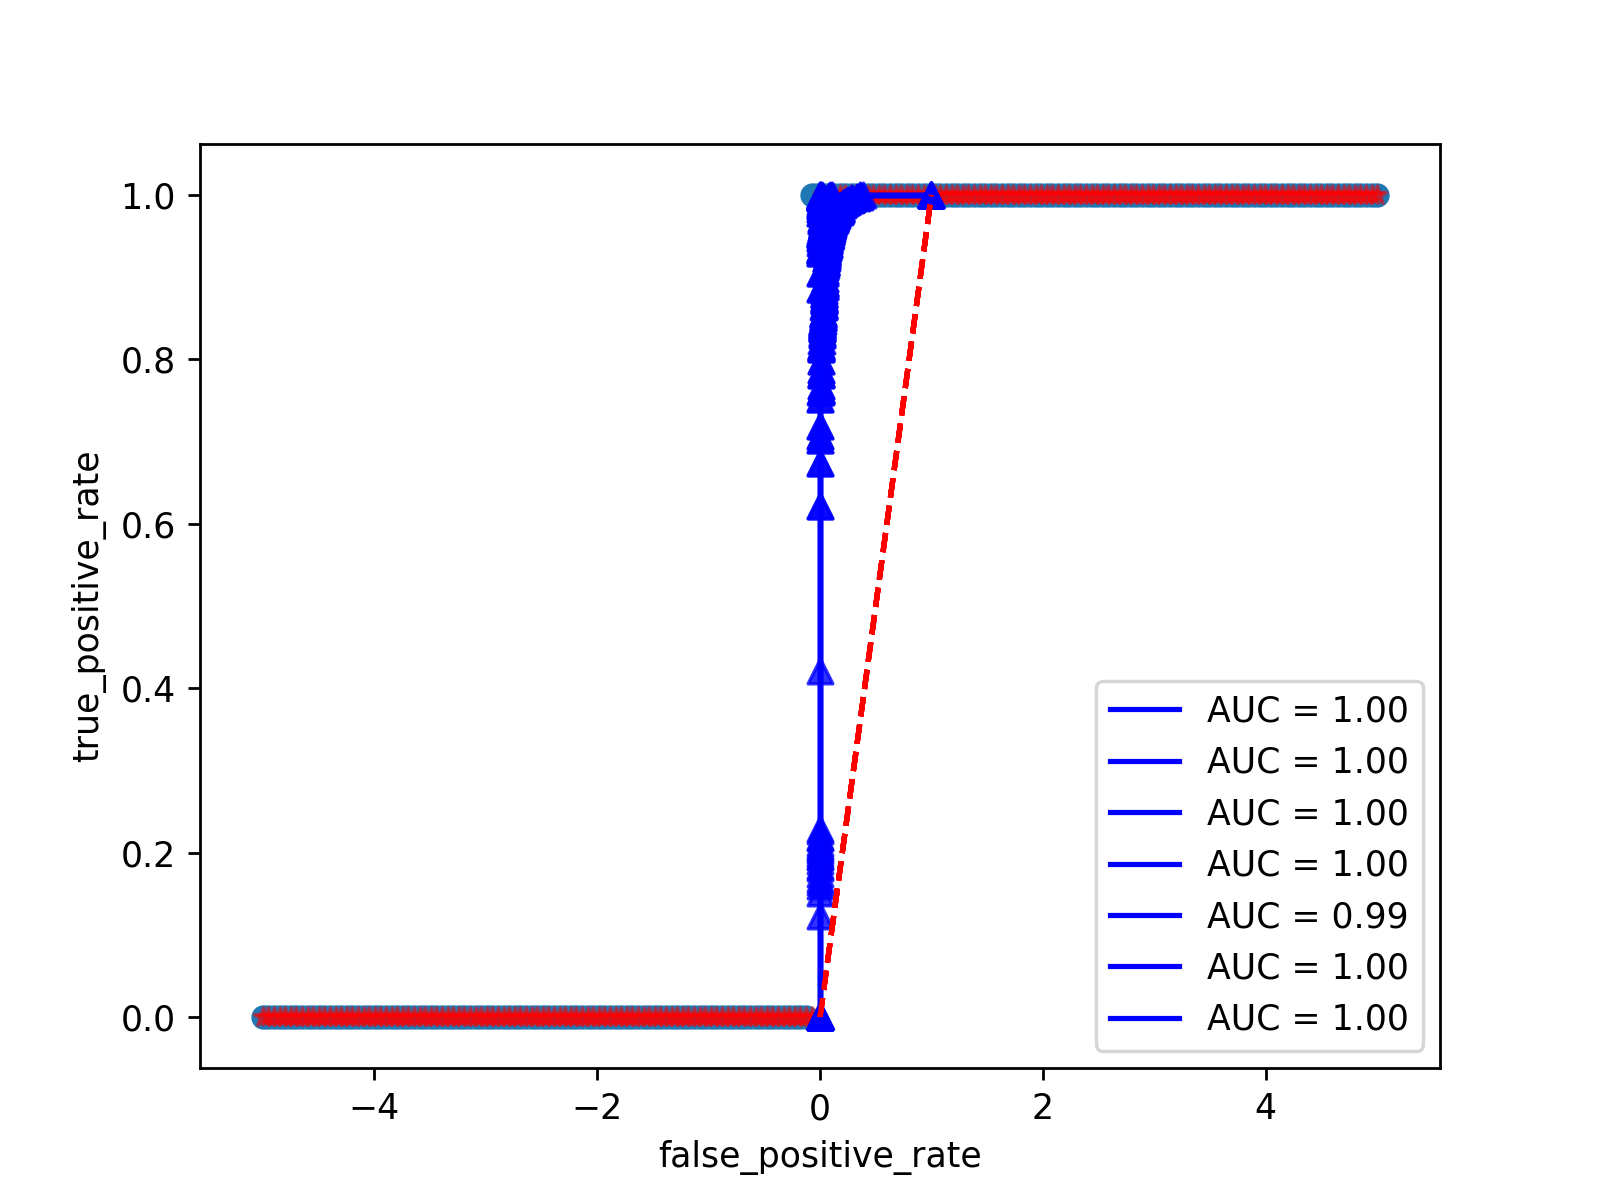

In [125]:
print("=========================5.1.2===============================")
predictions=classifier.predict(Xtoy_test.reshape(-1,1))
plt.figure()
plt.scatter(Xtoy_test, predictions)
plt.xlabel('Xtoy_test')
plt.ylabel('Predictions')
plt.show()
# create test labels
ytest_toy = ((np.sign(Xtoy_test)+1)/2.0).ravel()
plt.scatter(Xtoy_test, ytest_toy, color ='red', alpha=0.5, marker='*', s=30)
plt.xlabel('Xtoy_test')
plt.ylabel('ytest_toy')
plt.show()

## 5.2 *Example*. Electrical Grid Stability with Simulated Data

This simulated [dataset](http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) is related to local stability of a 4-node star system (electricity producer is in the center), which implements a decentralised Smart Grid Control concept. 

>Arzamasov, Vadim, Klemens Boehm, and Patrick Jochem. ['Towards Concise Models of Grid Stability.'](https://dbis.ipd.kit.edu/download/DSGC_simulations.pdf) Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), 2018 IEEE International Conference on. IEEE, 2018 

*Note that, in many engineering applications such datasets can be generated through simulations (easy) or experimentation (harder). Different from classical ML applications, engineers often have a very good understanding of the underlying physical models, which gives a unique advantage. We will, however, keep it simple in this workshop and use the dataset as is.*

Let's load and process the dataset.

In [126]:
griddata=pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [127]:
Xgrid = griddata.iloc[:, 0:13]
Xgrid.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860

In [128]:
ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]
print("prepared data: ",Xgrid[0:5], ygrid[0:5])

prepared data:         tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860   [0, 1, 0, 0, 0]


### Question 5.3.  Checking Grid Stability using Logistic Regression (LR)  (6 pts)

Now, we can use the simulated dataset *(Xgrid,ygrid)* to check grid stability. We will use first logistic regression for this purpose. Unfortunately, it is not possible to directly visualise this dataset, so we have to use performance metrics.

1. (1 pt) Preprocess and normalise *Xgrid* using a [*sklearn.preprocessing*](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). You can use, for example, *StandardScaler* or *MinMaxScaler*.
2. (2 pts) Train a logistic regression model that classifies the grid as stable or not, based on input *Xgrid*. Don't forget to divide *Xgrid* into training and test sets. Quantify the performance of LR using standard metrics such as accuracy, precision, recall, and f1 score on the test set. Plot the [ROC curve](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). How do these change w.r.t. [parameter C](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)? Discuss your observations.
3. (2 pts) What are the coefficients of the LR that you trained? What do they tell you about the impact of independent input variables on the dependent output variable *ygrid*? Discuss. *Hint: you can use [regressors package](https://regressors.readthedocs.io/en/latest/index.html) stats function to calculate p-values. See, e.g. [this](http://www.r-tutor.com/elementary-statistics/logistic-regression/significance-test-logistic-regression) or [this](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients) for info.* 
4. (1 pts) Use a nonlinear SVM, e.g. with rbf kernel, to solve the problem. Quantify the performance of SVM classifier and compare with LR one. Discuss your findings.

**Answer as text here**
2. C parameter is the regularization parameter. When C is small, we increase the regularization strength which will create simple models which underfit the data, so the scores are low. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data. From our results, we can see that without regularisation's scores is lower than the with regularisation term, so regularisation term prevent overfit. When C is very small, we have a poor score and poor ROC because we are underfitting the data.
3. From the printed coeffcients and the printed p values, we can see that when p value is large, that means that feature is less relevant than others which matches the definition of p values which is larger p corresponding to less dependence of output(a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response).However we can't intuitively interpret the coefficients with the impact of independent input on dependent output since it's not a linear model, that's why we need to compute p value to see the impact.
4. Both SVM and LR have good performance on scores, but SVM is much slower than LR because SVM the rbf method is using higher dimension to solve the problem, it's more complex so that it takes more time. And, by comparing the accuracy and other standard metrics, we find that LR is a little more accurate than the result of SVM.

In [129]:
print("=========================5.3.1===============================")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xgrid)
scaler_Xgrid = scaler.transform(Xgrid)
print(scaler_Xgrid)
ylabel_init=np.array(ygrid)

#divide the data to training and test sets using the default ratio
X_train, X_test, y_train, y_test = train_test_split(scaler_Xgrid, ylabel_init.reshape(-1,1))

=========================5.3.1===============================
[[-0.83537431 -0.79131661  1.14170354 ...  1.32162751  1.57902607
   1.07312049]
 [ 1.47829663 -0.12670487 -0.80311147 ...  0.13542358  0.93625569
  -0.58748693]
 [ 1.35709296  1.31213982 -0.80349871 ...  1.14659574 -1.51380226
  -0.33209522]
 ...
 [-1.05234609 -0.87804866  1.28587062 ... -1.37001303 -1.38205402
  -1.28776846]
 [ 1.59768553 -0.45784646 -0.90902909 ...  1.32772953  1.06982944
   0.59749703]
 [ 0.4669346   0.55855544 -0.32829064 ... -0.53325125  1.52285961
   0.79996368]]


In [130]:
print("=========================5.3.2===============================")
from sklearn.metrics import (accuracy_score,precision_score, recall_score, f1_score)
clf_l1_LR_NO = LogisticRegression(tol=0.0001,solver='lbfgs')
clf_l1_LR_NO.fit(X_train, y_train.ravel())
y_pred = clf_l1_LR_NO.predict(X_test)
coef_l1_LR_NO = clf_l1_LR_NO.coef_.ravel()
sparsity_l1_LR_NO = np.mean(coef_l1_LR_NO == 0) * 100

print("without--->taccuracy_score:%1.5f" % accuracy_score(y_test, y_pred))
print("without--->tPrecision: %1.5f" % precision_score(y_test, y_pred))
print("without--->tRecall: %1.5f" % recall_score(y_test, y_pred))
print("without--->tF1: %1.5f\n" % f1_score(y_test, y_pred))
    
for i, C in enumerate((10,1,0.1,0.01,0.0001)):
#     clf_l1_LR = LogisticRegression(C=C, penalty='l1',tol=0.0001,solver='saga')
    clf_l1_LR = LogisticRegression(C=C, tol=0.0001, solver='lbfgs')
    clf_l1_LR.fit(X_train, y_train)
    y_pred = clf_l1_LR.predict(X_test)
    coef_l1_LR = clf_l1_LR.coef_.ravel()

#     sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    print("C=%.8f" % C)  
    print("\taccuracy_score:%1.5f" % accuracy_score(y_test, y_pred))
    print("\tPrecision: %1.5f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.5f" % recall_score(y_test, y_pred))
    print("\tF1: %1.5f\n" % f1_score(y_test, y_pred))   
    #roc and auc of test data
    predictions=clf_l1_LR.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions[:,1])
    roc_auc=auc(false_positive_rate,true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f' % roc_auc)
    plt.scatter(false_positive_rate, true_positive_rate, color ='blue', alpha=0.8, marker='^', s=50)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    plt.show()

=========================5.3.2===============================
without--->taccuracy_score:0.99880
without--->tPrecision: 0.99887
without--->tRecall: 0.99775
without--->tF1: 0.99831

C=10.00000000
	accuracy_score:0.99880
	Precision: 0.99887
	Recall: 0.99775
	F1: 0.99831

C=1.00000000
	accuracy_score:0.99880
	Precision: 0.99887
	Recall: 0.99775
	F1: 0.99831

C=0.10000000
	accuracy_score:0.99360
	Precision: 0.99321
	Recall: 0.98874
	F1: 0.99097



C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C=0.01000000
	accuracy_score:0.97560
	Precision: 0.97474
	Recall: 0.95608
	F1: 0.96532

C=0.00010000
	accuracy_score:0.71480
	Precision: 1.00000
	Recall: 0.19707
	F1: 0.32926



In [131]:
print("=========================5.3.3===============================")
import scipy
#compute p-value
def coef_se(clf, X, y):
    n = X.shape[0]
    X1 = np.hstack((np.ones((n, 1)), np.matrix(X)))
    se_matrix = scipy.linalg.sqrtm(
        metrics.mean_squared_error(y, clf.predict(X)) *
        np.linalg.inv(X1.T * X1)
    )
    return np.diagonal(se_matrix)
def coef_tval(clf, X, y):
    a = np.array(clf.intercept_ / coef_se(clf, X, y)[0])
    b = np.array(clf.coef_ / coef_se(clf, X, y)[1:])
    return np.append(a, b)
def coef_pval(clf, X, y):
    n = X.shape[0]
    t = coef_tval(clf, X, y)
    p = 2 * (1 - scipy.stats.t.cdf(abs(t), n - 1))
    return p
clf_test = LogisticRegression(C=1.0,solver='lbfgs')
clf_test.fit(X_train, y_train.ravel())
p_value = coef_pval(clf_test,X_train,y_train.ravel())
print("p_value=",p_value)
print("p_value.shape =",p_value.shape)
print("logistic regression bias：",clf_test.intercept_)
print("logistic regression coefficient：",clf_test.coef_)

=========================5.3.3===============================
p_value= [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.97213521e-03
 2.22044605e-16 9.99998957e-01 9.99999310e-01 9.99998010e-01
 9.99993237e-01 0.00000000e+00 0.00000000e+00 1.14404030e-07
 0.00000000e+00 0.00000000e+00]
p_value.shape = (14,)
logistic regression bias： [-6.38697599]
logistic regression coefficient： [[-3.65401590e-02  8.82763463e-02  1.20858443e-03  3.93407049e-03
  -2.51727303e-02  5.51978255e-03 -1.59267187e-02  5.41307140e-02
   4.86543021e-02 -5.38690735e-02 -2.51942968e-03 -2.46051774e-02
  -1.49300065e+01]]


In [132]:
print("=========================5.3.4===============================")
import time
start = time.time()

clf_test = LogisticRegression(C=1.0)
clf_test.fit(X_train, y_train.ravel())
y_pred = clf_test.predict(X_test)
y_predprob = clf_test.predict_proba(X_test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_predprob[:,1])
auc1 = metrics.roc_auc_score(y_test, y_predprob[:,1])

print("\taccuracy_score:%1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
plt.plot(fpr1, tpr1, 'b', label='AUC = %0.2f' % auc1)
plt.scatter(fpr1, tpr1, color ='blue', alpha=0.8, marker='^', s=50)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

end = time.time()
print ("LR timecost：",end-start)

####################################################################
start = time.time()

#model = SVC(kernel='rbf',probability = True,gamma = 'auto')
model = svm.SVC(kernel='rbf',probability = True)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
y_predprob = model.predict_proba(X_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_predprob[:,1])
auc2 = metrics.roc_auc_score(y_test, y_predprob[:,1])

print("\taccuracy_score:%1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
plt.plot(fpr2, tpr2, 'b', label='AUC = %0.2f' % auc2)
plt.scatter(fpr2, tpr2, color ='blue', alpha=0.8, marker='^', s=50)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

end = time.time()
print ("SVM timecost：",end-start)

=========================5.3.4===============================
	accuracy_score:0.999
	Precision: 0.999
	Recall: 0.998
	F1: 0.998

LR timecost： 0.074798583984375


C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yue\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


	accuracy_score:0.988
	Precision: 0.986
	Recall: 0.981
	F1: 0.984

SVM timecost： 2.4286012649536133


## 6 (_Optional_ Bonus, 10 pts) Communications Detective 

Your job as a detective is to distinguish malicious people's communications from background civilian communication traffic. As a 21st century detective, you have access to a cognitive radio network and you have ML knowledge!

The [dataset](files/svm_bonus_data.csv) is collected from a simulation where there are multiple malicious people and civilians communicating in a region with multiple passive cognitive radio nodes.
Data about each transmission source is collected from the listener nearest to it. The objective is to classify if a transmission source is an rogue agent or a civilian based on the data.

<img align="left" src="img/detective.png" width="200" hspace="20"/>      <img align="center" src="img/omnet.png" width="400" hspace="20"/>

The data file contains data from 2 classes:
 * civilians - 129 instances (labeled as +1)
 * rogue agents - 129 instances (labeled as -1)

**Features/attributes** are **not** normalised.
1. label 2. carrier_frequency 2. bandwidth 3. bitrate 4. session duration 5. message_length 6. inter-arrival time (iat)

For full bonus points:
1. Normalise and investigate the data, try e.g. PCA.
2. Try multiple classifiers, e.g. SVM and logistic regression, find their hyper-parameters.
3. Do cross validation, give performance results using metrics, compare/contrast methods.
4. Discuss your findings based on your theoretical/practical knowledge.

In [133]:
commdata=pd.read_csv('files/svm_bonus_data.csv')
commdata.head()

label  carrier_frequency   bandwidth    bitrate  duration  message_length  \
0     -1       3.000000e+09  10000000.0  4000000.0  0.000288      138.924685   
1     -1       3.000000e+09  10000000.0  3000000.0  0.000366      133.339841   
2     -1       2.000000e+09  15000000.0  3000000.0  0.000369      134.657356   
3     -1       3.000000e+09  10000000.0  4000000.0  0.000295      142.475129   
4     -1       2.000000e+09  10000000.0  4000000.0  0.000287      138.554019   

         iat  
0  12.294593  
1  12.343191  
2  12.494220  
3  12.323291  
4  12.472884

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on LMS.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in LMS by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90061 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 

### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!